<center>
<font size="6">ĐẠI HỌC QUỐC GIA THÀNH PHỐ HỒ CHÍ MINH</font><br>
<font size="5">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN</font><br>
<font size="5">KHOA CÔNG NGHỆ THÔNG TIN</font><br>


---


<font size="5">Lập trình song song ứng dụng</font><br>

<font size="5">KMeans-Credit Card Segmentation</font><br>

</center>



---

<div style="display: flex; justify-content: center;">
  <div style="margin-right: 50px;">
    <p><strong>Giảng viên lý thuyết:</strong> Phạm Trọng Nghĩa</p>
    <p><strong>Giảng viên hướng dẫn:</strong> Phạm Trọng Nghĩa</p>
    <p><strong>Nhóm:</strong> 20127214_20127612</p>
  </div>
  <div>
    <p><strong>Sinh viên thực hiện:</strong></p>
    <p>20127214 – Nguyễn Trương Minh Khôi</p>
    <p>20127612 – Đỗ Khánh Sang</p>
    <p><strong>Lớp:</strong> 20KHDL</p>
  </div>
</div>



---



**Resources:**

* Github Repository: [Github](https://github.com/iamdkSang/KMeans---credit-card-segmentation)

* Source Code: [Github](https://github.com/iamdkSang/KMeans---credit-card-segmentation)

* Detailed Report: [Github](https://github.com/iamdkSang/KMeans---credit-card-segmentation)

<br>

**Table of Contents:**

* 1. Introduction
* 2. Background
  - 2.1. Problem
  - 2.2. KMeans
* 3. Initial Setups
  - 3.1. Import libraries
  - 3.2. Download dataset
  - 3.3. Processing time dataframe
* 4. Dataset
  - 4.1. Information
  - 4.2. Data Preprocessing
* 5. Implementation
  - 5.1. Kmeans Algorithm
  - 5.2. PCA Algorithm
  - 5.3. Meaning of clusters
* 6. Result



---



# Duty chart

| STT | Student Name   | Student ID | Work                    | Done |
|-----|----------------|-----------------|------------------------------|-------------------|
| 1   | Nguyễn Trương Minh Khôi   | 20127214          | Code sequential KMean           | 100%              |
| 2   | Nguyễn Trương Minh Khôi   | 20127214          | Parallelize code KMean on CPU and GPU                 | 100%               |
| 3   | Nguyễn Trương Minh Khôi   | 20127214          | Design slides             | 100%               |
| 4   | Đỗ Khánh Sang  | 20127612          | Code sequential PCA  | 100%               |
| 5   | Đỗ Khánh Sang  | 20127612          | Parallelize code PCA on CPU and GPU  | 100%               |
| 6   | Đỗ Khánh Sang  | 20127612          | Optimize parallel Kmean on GPU | 100%               |
| 7   | Đỗ Khánh Sang  | 20127612          | Data preprocessing,  analysis and extract insight | 100%               |
| 8   | Đỗ Khánh Sang  | 20127612          | Write Report | 100%               |

# **1. Introduction**

In this project, we are working on KMeans clustering algorithms to improve its performance and efficiency. Using GPU computing and parallel processing, the model will be able to handle larger datasets and require less training time. We are going to use KMeans for credit card customer segmentation with Python and Numba. The model will be paralyzed by some specific tasks like calculating distance between each data point, assigning data points to proper clusters and updating new centroids. After that we will use PCA to reduce the dimension of clusters since the dataset has many attributes. Finally, we compare running time and the accuracy of each version of KMeans such as sequent code, scikit-learn code and paralyzed code to figure out the most proficient version.

Keywords: `Parallel Computing`, `KMeans Clustering`, `GPU Acceleration`, `Numba`, `Credit Card Segmentation`.

# **2. Background**

## **2.1. Problem**

Credit card segmentation is a strategic approach that involves dividing a customer base into distinct groups based on various criteria such as demographics, spending patterns, and preferences. So, to KMeans it means grouping customers based on their transaction behaviors to identify patterns and trends.

## **2.2. KMeans**


KMeans clustering is a popular method for vector quantization. It starts with $k$ central points which are chosen randomly then it starts grouping these points and others based on their Euclid distance. It continues this process until all points converge. However, the algorithm is computationally intensive, especially with large datasets, as it requires repeated distance calculations between data points and centroids, data points assigning to proper group and centroids updating.

### a) Distance measurement
The Euclidean distance is commonly used as the distance measure:

<center>
$
\left \| x_{p} - \mu_{i} \right \| = \sqrt{\sum_{j=1}^{n}\left (x_{pj} - \mu_{ij}  \right )^{2}}
$
</center>

Where:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{pj}$ is the $j^{th}$ feature of the $p^{th}$ data point.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mu_{ij}$ is the $j^{th}$ feature of the $i^{th}$ centroid.

This is the most calculated step in KMeans algorithm. Each data point needs to calculate the distance to all centroids, and this job can be done independently for each data point. Therefore, we can be parallel by dividing the data points equally for threads or blocks (blocks) on the GPU.

### b) Assign data points
Assign each data point to the nearest centroid. This can be represented as:
<center>
$
C_{i} = \left \{ x_{p}:\left \| x_{p} - \mu_{i} \right \|^{2} \leq \left \| x_{p} - \mu_{j} \right \|^{2} \forall j, 1 \leq  j \leq k \right \}
$
</center>

Where:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{p}$ is data points.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mu_{i}$ is the $i_{th}$ centroid.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $C_{i}$ is the set of points assigned to the $i_{th}$ cluster.  

After calculating the distance, each data point needs to be labeled with the nearest centroid. This work can also be done independently for each data point and can be parallel to the same way.

### c) Update new central
Calculate the new centroids as the mean of all data points assigned to each cluster:

<center>
$
\mu_{i} = \frac{1}{\left |C_{i}  \right |} \sum_{x_{p} \in C_{i}}x_{p}
$
</center>
Where $C_{i}$ is the number of points in the $i^{th}$ clusters.  

After labeling, we need to update the position of the centroids by calculating the average data points assigned to each centroid. This step includes:

*   Calculate the sum of data points for each centroid (parallel the process of calculating the sum for each centroid).
*   Count the number of data points in each cluster (can be done
simultaneously with the sum step).

### d) Pseudo code
```
# Basic idea of parallelized KMeans
while not converged:
    # Step 1: Assign clusters (parallelizable)
    for each data point in parallel:
        assign to nearest centroid

    # Step 2: Update centroids (parallelizable)
    for each centroid in parallel:
        update centroid position
```



# **3. Initial Setups**

## **3.1. Import libraries**

In [1]:
!pip install kneed

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import pearsonr
#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
from numba import jit, cuda, float32, float64, int32, prange


import warnings
warnings.filterwarnings("ignore")    # (Optional)

## **3.2. Download dataset**

In [2]:
!git clone https://github.com/iamdkSang/KMeans---credit-card-segmentation

fatal: destination path 'KMeans---credit-card-segmentation' already exists and is not an empty directory.


## **3.3. Processing time dataframe**

In [3]:
kmean_results = pd.DataFrame(columns=['Whole Kmeans algorithm', 'Calculating distance and Assigning label', 'Updating centers', 'Loop', 'Accuracy'], dtype=float)
pca_results = pd.DataFrame(columns=['Whole PCA algorithm', 'Calculate Covariance matrix', 'Reduce dimension of data'], dtype=float)


# **4. Dataset**

## **4.1. Information**

Dataset Name: Credit Card Dataset for Clustering

Description:
* This case requires to develop a customer segmentation to define marketing strategy.
* The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.
*   The file is at a customer level with 18 behavioral variables.

Kaggle Link: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

Following is the Data Dictionary for Credit Card dataset:


`CUST_ID` : Identification of Credit Card holder (Categorical)

`BALANCE` : Balance amount left in their account to make purchases

`BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

`PURCHASES` : Amount of purchases made from account

`ONEOFF_PURCHASES` : Maximum purchase amount done in one-go

`INSTALLMENTS_PURCHASES` : Amount of purchase done in installment

`CASH_ADVANCE` : Cash in advance given by the user

`PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

`ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

`PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

`CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid

`CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"

`PURCHASES_TRX` : Numbe of purchase transactions made

`CREDIT_LIMIT` : Limit of Credit Card for user

`PAYMENTS` : Amount of Payment done by user

`MINIMUM_PAYMENTS` : Minimum amount of payments made by user

`PRCFULLPAYMENT` : Percent of full payment paid by user

`TENURE` : Tenure of credit card service for user


## **4.2. Data Preprocessing**

In [4]:
# Import customer dataset
data = pd.read_csv(r'/content/KMeans---credit-card-segmentation/data/CC GENERAL.csv')
df = pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#overview

df_overview = []
columns = df . columns . drop("CUST_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'aqua', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,BALANCE,float64,8871,0,0.000000,0
1,BALANCE_FREQUENCY,float64,43,0,0.000000,0
2,PURCHASES,float64,6203,0,0.000000,0
3,ONEOFF_PURCHASES,float64,4014,0,0.000000,0
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000,0
5,CASH_ADVANCE,float64,4323,0,0.000000,0
6,PURCHASES_FREQUENCY,float64,47,0,0.000000,0
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


In [7]:
df.drop('CUST_ID', axis=1, inplace = True)

### Missing Value Elimination

In [8]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [9]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
# MINIMUM_PAYMENTS has so much missing value so it is reasonable to find a solution for fill them
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


Obviously, the value of zero should be used for MINIMUM_PAYMENTS's cells Who they haven't done any payments so ➡ PAYMENTS = 0 ➡ MINIMUM_PAYMENTS = 0

In [11]:
# There are a number of rows where PAYMENTS's values are less than MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])]

Shape: (2364, 2)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8932,106.138603,337.294767
8938,72.530037,110.950798
8946,81.270775,82.418369
8947,52.549959,55.755628


⚪ For filling the missing values ofMINIMUM_PAYMENTS , we proceed as follows:

*   If it has the value of PAYMENTS and is equal to zero, we consider the zero for it
*   If PAYMENTS is a value between 0 and PAYMENTS_MEAN, we use PAYMENTS
*   Otherwise, we use PAYMENTS_MEAN





In [12]:
minpay = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True):
        minpay[i] = payments
    elif minpayments == True:

        minpay[i] = payments_mean
    i += 1

print(f'Missing (before): {df.isna().sum().sum()}')
print(f'Missing (after): {minpay.isna().sum().sum()}')

df['MINIMUM_PAYMENTS'] = minpay.copy()

Missing (before): 313
Missing (after): 0


### Noise Data Elimination

In [13]:
 #Dropping some of outliers
df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]

In [14]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Augment data

In [15]:
# Function to add noise
def add_noise(data, noise_level=0.01):
    noisy_data = data.copy()
    for col in data.select_dtypes(include=[np.number]).columns:
        noise = noise_level * np.random.normal(size=data[col].shape)
        noisy_data[col] += noise
    return noisy_data

# Function to scale features
def scale_features(data, scale_range=(0.9, 1.1)):
    scaled_data = data.copy()
    for col in data.select_dtypes(include=[np.number]).columns:
        scale_factor = np.random.uniform(scale_range[0], scale_range[1])
        scaled_data[col] *= scale_factor
    return scaled_data

# Function to generate synthetic samples
def generate_synthetic_samples(data, n_samples):
    synthetic_data = pd.DataFrame()
    for _ in range(n_samples):
        sample1 = data.sample(1).reset_index(drop=True)
        sample2 = data.sample(1).reset_index(drop=True)
        new_sample = (sample1 + sample2) / 2
        synthetic_data = pd.concat([synthetic_data, new_sample], ignore_index=True)
    return synthetic_data

# Function to bootstrap samples
def bootstrap_samples(data, n_samples):
    return data.sample(n_samples, replace=True).reset_index(drop=True)

# Number of synthetic samples to generate
n_synthetic_samples = 100

# Applying augmentation techniques
noisy_data = add_noise(df)
scaled_data = scale_features(df)
synthetic_data = generate_synthetic_samples(df, n_synthetic_samples)
bootstrapped_data = bootstrap_samples(df, n_synthetic_samples)

# Combining all augmented data
augmented_data = pd.concat([df, noisy_data, scaled_data, synthetic_data, bootstrapped_data], ignore_index=True)

# Display the first few records of the augmented dataset
augmented_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,0.000000,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26988,4.843351,0.090909,368.28,0.00,368.28,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,935.500113,29.977414,0.000000,12.0
26989,1428.118364,1.000000,119.34,0.00,119.34,2563.324769,0.750000,0.000000,0.666667,0.250000,14.0,27.0,1200.0,2545.222796,7960.080674,0.090909,12.0
26990,109.594389,1.000000,177.00,177.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1950.0,170.471030,221.171027,0.000000,12.0
26991,2465.684327,1.000000,467.70,467.70,0.00,934.710802,0.416667,0.416667,0.000000,0.083333,1.0,13.0,3000.0,784.234756,958.838221,0.000000,12.0


### Normalizing

In [16]:
from sklearn.preprocessing import StandardScaler
df_model = augmented_data.copy()

scaler = StandardScaler()
df_Standardize = pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
df_Standardize

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.746442,-0.251055,-0.466227,-0.397786,-0.366737,-0.477095,-0.796973,-0.679143,-0.703851,-0.674946,-0.482066,-0.519351,-0.957262,-0.550885,-0.325315,-0.525947,0.295737
1,0.815056,0.132945,-0.517158,-0.397786,-0.479415,2.624654,-1.220516,-0.679143,-0.915842,0.605827,0.133743,-0.604440,0.758143,0.866611,0.112635,0.243840,0.295737
2,0.465711,0.516945,-0.104386,0.138529,-0.479415,-0.477095,1.320738,2.670424,-0.915842,-0.674946,-0.482066,-0.093906,0.901094,-0.398184,-0.096312,-0.525947,0.295737
3,0.056526,-1.019056,0.283113,0.642006,-0.479415,-0.378025,-1.008746,-0.400013,-0.915842,-0.248023,-0.328114,-0.561895,0.901094,-0.624209,-0.390813,-0.525947,0.295737
4,-0.362774,0.516945,-0.508616,-0.386687,-0.479415,-0.477095,-1.008746,-0.400013,-0.915842,-0.674946,-0.482066,-0.561895,-0.900082,-0.377739,-0.275887,-0.525947,0.295737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26988,-0.764251,-3.323060,-0.320544,-0.397786,-0.044436,-0.477095,1.320738,-0.679143,1.628054,-0.674946,-0.482066,-0.093906,-0.957262,-0.284299,-0.376739,-0.525947,0.295737
26989,-0.061295,0.516945,-0.453446,-0.397786,-0.338461,0.756935,0.685425,-0.679143,0.780090,0.605827,1.673264,0.544261,-0.900082,0.300587,3.346328,-0.211034,0.295737
26990,-0.712515,0.516945,-0.422663,-0.275008,-0.479415,-0.477095,-1.008746,-0.400013,-0.915842,-0.674946,-0.482066,-0.561895,-0.685656,-0.562269,-0.286977,-0.525947,0.295737
26991,0.451159,0.516945,-0.267467,-0.073362,-0.479415,-0.027108,-0.161659,0.716511,-0.915842,-0.248023,-0.328114,-0.051362,-0.385460,-0.339261,0.059347,-0.525947,0.295737


# **5. Implementation**

## **5.1. Kmeans Algorithm**

KMeans is a commonly-used clustering algorithm that seeks partitions a set of observations into a user-defined number of clusters (k) by minimizing the within-cluster sum of squares. Advantages of the algorithm include the fact that it is easily understood, and that it tends to be performant relative to other clustering approaches. Disadvantages include the user needing to specify a fixed number of clusters up front, the model's assumption that clusters are always spherical, susceptibility to outliers, sensitivity to initial cluster centroid values, and the need to use input features that allow for Euclidean distance metrics.  

Evaluation Metrics: Elbow Method for optimal value of k in KMeans

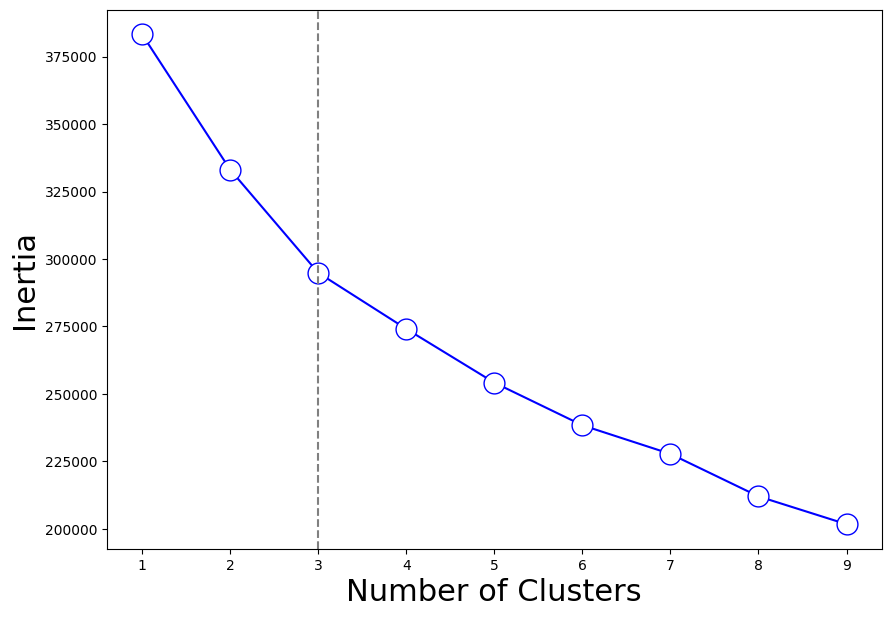

In [17]:
from sklearn.cluster import KMeans

inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_Standardize)
    inertias.append(kmeans.inertia_)


from kneed import KneeLocator, DataGenerator
kelbow = KneeLocator(range(1, 10), inertias, curve = 'convex', direction = 'decreasing')
kelbow.elbow

fig, ax = plt.subplots(facecolor="white",figsize = (10 ,7))

plt.plot(np.arange(1 , 10) , inertias  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
plt.xlabel('Number of Clusters',fontname="Gabriola",fontsize=22) , plt.ylabel('Inertia',fontname="Gabriola",fontsize=22)
plt. grid(False)

plt.annotate('Elbow: Optimal number of clusters  ', xy=(4, 98000), xytext=(5, 110000),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='black', shrink=0.05),)

ax.set_facecolor("white")


plt.axvline(x=kelbow.elbow, color ='gray', label = 'axvline - full height', ls = '--')
plt.show();

Since the optimal number of clusters is 3, we will create and pre-fix 3 initial centers using the kmean++ library, and use these centers for all KMean versions.

In [18]:
from sklearn.cluster import kmeans_plusplus

K = 3
init_centers, init_indices = kmeans_plusplus(df_Standardize.to_numpy(), n_clusters=K, random_state=0)
init_centers

array([[-0.66180739,  0.55616371, -0.51715345, -0.39778143, -0.47940134,
        -0.32753686, -1.22768357, -0.6860673 , -0.92095009,  0.22583499,
        -0.02324039, -0.60406748, -1.1573905 , -0.50338591, -0.29986066,
        -0.29554611,  0.29092133],
       [-0.57119401,  0.51511188,  0.46363705,  0.6667298 , -0.12213598,
        -0.47708825,  1.29987769,  2.42962184,  1.40349467, -0.59591717,
        -0.48376554,  2.03339882, -0.671363  , -0.29180477, -0.25958633,
         1.22306155,  0.31057591],
       [-0.71493593,  0.51762484, -0.09901349, -0.39779049,  0.44568753,
        -0.47708193,  1.27635188, -0.66911143,  1.60816478, -0.68605017,
        -0.47783067, -0.09448323, -0.47122623, -0.35737978, -0.29631017,
         1.75226117,  0.29151723]])

### **I. KMeans code from Scikit-learn**
Using Scikit-learn to get final cluster to compare with each KMeans function which help to check for the correctness.

In [19]:
Kmean_sklearn = KMeans(n_clusters=K, init=init_centers)
Kmean_sklearn.fit(df_Standardize)
correct_centers = Kmean_sklearn.cluster_centers_
correct_centers

array([[ 0.20809188, -0.11719276, -0.38819029, -0.26177949, -0.4226846 ,
         0.31542281, -0.86556188, -0.39980518, -0.76230669,  0.44029527,
         0.32161154, -0.49403549, -0.05651183, -0.061226  ,  0.03655411,
        -0.39675207, -0.0911139 ],
       [ 0.84788871,  0.45007708,  2.43917365,  2.13022207,  1.8248729 ,
         0.14569883,  1.13592286,  1.66342495,  1.02242189, -0.06436348,
         0.06636776,  2.33120924,  1.25258845,  1.55035679,  0.48124622,
         0.33435475,  0.29026305],
       [-0.38847592,  0.05337346,  0.00768782, -0.08136216,  0.15656261,
        -0.38564753,  0.78441489,  0.15926332,  0.68691578, -0.49057732,
        -0.37855803,  0.14763192, -0.15892279, -0.20664539, -0.12749724,
         0.39278159,  0.0521346 ]])

### **II. Sequential code version 1: pure KMeans code using Python**

In this version, we use pure Python to develop KMeans algorithm. Additionally, because of optimized code we applied `KMeans++` library in order to initial first stage centers which helps reduce loop and stabilize final centers of each cluster as well as processing time

#### Function to generate suitable centers for KMeans
Using `Kmeans++` to find optimized centers.
- Input: normalized data, number of clusters
- Output: optimized centers

In [20]:
# initial centers
def kmeans_init_centers():
    return np.array(init_centers)

#### Function to calculate distance between each data point
Computes the Euclidean distance between each data point and each cluster center.
- Input: center of each cluster, each data point
- Output: Euclidean distance

In [21]:
# calculate distance between data points using Euclid distance
def kmeans_cal_distance(point_1, point_2):
    # calculate sum of each element (x,y,z,...) of each point
    sum_point = 0
    for i in range(len(point_1)):
        sum_point += (point_1[i] - point_2[i])**2
    return np.sqrt(sum_point)

#### Function to assign label for each data point
Assign each data point to the nearest centroid.
- Input: normalized data, centers of each cluster
- Output: list of labeled data points, sum of processing time of function `kmeans_cal_distance`

In [22]:
# assign label for each point corresponding to each cluster that point related
def kmeans_assign_labels(df_Standardize, centers):
    # store label of each data point
    assigned_labels = []
    for i in range(len(df_Standardize)):
        distance = []
        # calculate distance from each data point to each center
        for j in range(len(centers)):
            distance.append(kmeans_cal_distance(centers[j], df_Standardize[i]))
        # find closest center
        index = np.argmin(distance)
        # assign data points to proper cluster
        assigned_labels.append(index)
    return assigned_labels

#### Function to find new center for each cluster
Calculate the new centroids as the mean of all data points assigned to each cluster.
- Input: normalized data, assigned data points, number of clusters
- Output: new centers correspond to each cluster

In [23]:
# update new centroids
def kmeans_update_centroids(df_Standardize, labels, K):
    centers = []
    # collect all points assigned to the k-th cluster
    # take average
    for k in range(K):
        # store points of each cluster
        cluster_k = []
        for i in range(len(labels)):
            if labels[i] == k:
                cluster_k.append(df_Standardize[i])
        # update new center
        # sum all data point in each cluster
        new_center = np.zeros(df_Standardize.shape[1])
        for i in range(len(cluster_k[0])):
            for j in range(len(cluster_k)):
                new_center[i] += cluster_k[j][i]
        # take average
        for i in range(len(new_center)):
            new_center[i] = new_center[i]/len(cluster_k)

        centers.append(new_center)
    return centers

#### Function to find converged stage
Check if new centers and previous centers has no different then stop the algorithm as we get final centers.
- Input: previous centers, new centers
- Output: `True` if satisfy given condition, otherwise return `False`

In [24]:
# stop condition
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    for i in range(len(centers)):
        for j in range(len(centers[i])):
            if centers[i][j] != new_centers[i][j]:
                return False
    return True

#### Code
Iterate through all included function to operate the algorithm:
Input: normalized data, number of clusters
Output: list of all centers, list of all labeled data points, number of iterations

In [25]:
def kmeans(df_Standardize, K):
    # store the center coordinates of each iteration
    centers = [np.array(kmeans_init_centers())]

    # save the label of each iteration
    labels = []
    it = 0

    step_1_time, step_2_time, step_3_time = 0.0, 0.0, 0.0
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition and append NEW center coordinates to centers
        # 4. update iteration
        start_1_time = time.time()
        assigned_labels = kmeans_assign_labels(df_Standardize, centers[it])
        step_1_time += time.time() - start_1_time

        labels.append(assigned_labels)

        start_2_time = time.time()
        new_centers = kmeans_update_centroids(df_Standardize, assigned_labels, K)
        step_2_time += time.time() - start_2_time

        start_3_time = time.time()
        converge = has_converged(centers[it], new_centers)
        step_3_time += time.time() - start_3_time

        if converge == True:
            break
        else:
            centers.append(new_centers)
            it += 1
    return centers, labels, it, {
        'kmeans_cal_distance_assign_label': step_1_time,
        'kmeans_update_centroids': step_2_time,
        'convergence': step_3_time,
    }

In [26]:
%%capture output_1
start = time.time()
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)
end = time.time()
print(f'Processing time: {end - start} s')
print(f"Processing time of Calculating distance and Assigning label: {timings['kmeans_cal_distance_assign_label']} s")
print(f"Processing time of Updating centers: {timings['kmeans_update_centroids']} s")
print(f"Processing time of Checking convergence: {timings['convergence']} s")
print(f'Number of loops: {it}')
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)


In [27]:
print(output_1)

Processing time: 48.40703558921814 s
Processing time of Calculating distance and Assigning label: 41.136682748794556 s
Processing time of Updating centers: 7.269763946533203 s
Processing time of Checking convergence: 0.0001976490020751953 s
Number of loops: 23
Centers found by k-means algorithm:
[array([ 0.20523834, -0.12108555, -0.38799689, -0.26159131, -0.42257108,
        0.31268199, -0.86445782, -0.3996772 , -0.76153645,  0.43655239,
        0.31881278, -0.49406744, -0.05726423, -0.0618454 ,  0.03561127,
       -0.39437248, -0.09014849]), array([ 0.8507762 ,  0.44989602,  2.44219713,  2.13167513,  1.82921853,
        0.147141  ,  1.13599538,  1.66357961,  1.02263335, -0.06300408,
        0.06781039,  2.3353027 ,  1.25398666,  1.5536688 ,  0.48321289,
        0.33321104,  0.2901496 ]), array([-0.38718536,  0.05867928,  0.00958203, -0.08005666,  0.15856588,
       -0.38496211,  0.78914533,  0.16184129,  0.69128701, -0.48959362,
       -0.37784772,  0.15033389, -0.15794106, -0.2061308

In [28]:
# @title Evalute

from IPython.display import display, Markdown

# Create a Markdown string with the variable
markdown_text = f"The total running time of the Kmean algorithm is: {end - start}, \
                of which the most time is the time to calculate the distance between points and assigning them: {timings['kmeans_cal_distance_assign_label']}, \
                the second is the time to update the center: {timings['kmeans_update_centroids']}, \
                and the last is the time to check convergence: {timings['convergence']}. And it takes {it} loops."

# Display the Markdown text
display(Markdown(markdown_text))


The total running time of the Kmean algorithm is: 48.40703558921814,                 of which the most time is the time to calculate the distance between points and assigning them: 41.136682748794556,                 the second is the time to update the center: 7.269763946533203,                 and the last is the time to check convergence: 0.0001976490020751953. And it takes 23 loops.

#### Accuracy
Compare the result of this version with the result of KMeans library. If there is no difference then the result is correct.

In [29]:
np.mean(np.abs(correct_centers - centers[-1]))

0.0016476973441983485

#### Processing time
Report processing time of each function in KMeans algorithm and total processing time of KMeans

In [30]:
kmean_results.loc['Sequential 1: Pure Python', 'Whole Kmeans algorithm'] = end - start
kmean_results.loc['Sequential 1: Pure Python', 'Calculating distance and Assigning label'] = timings['kmeans_cal_distance_assign_label']
kmean_results.loc['Sequential 1: Pure Python', 'Updating centers'] = timings['kmeans_update_centroids']
kmean_results.loc['Sequential 1: Pure Python', 'Loop'] = it
kmean_results.loc['Sequential 1: Pure Python', 'Accuracy'] = np.mean(np.abs(correct_centers - centers[-1]))
kmean_results

,Whole Kmeans algorithm,Calculating distance and Assigning label,Updating centers,Loop,Accuracy
Sequential 1: Pure Python,48.407036,41.136683,7.269764,23.0,0.001648


### **III. Sequential code version 2: Optimized sequential KMeans code**
Using numba with decorator @jit to optimize sequential KMeans code

#### Analyze
In this project we realize that there are 3 parts that occupy almost processing time `Calculating distance and Assigning label` and `Updating centers` so we are going to speed up these functions by running those sequentially on CPU by using @jit(cache=True, nopython=True) of numba.

#### Function to generate suitable centers for KMeans
Using `Kmeans++` to find optimized centers.
- Input: normalized data, number of clusters
- Output: optimized centers

In [31]:
# initial centers
def kmeans_init_centers():
    return np.array(init_centers)

#### Function to calculate distance between each data point
Computes the Euclidean distance between each data point and each cluster center.
- Input: center of each cluster, each data point
- Output: Euclidean distance



In [38]:
# calculate distance between data points using Euclid distance
@jit(cache=True, nopython=True)
def kmeans_cal_distance(point_1, point_2):
    sum_point = 0.0
    for i in range(len(point_1)):
        sum_point += (point_1[i] - point_2[i]) ** 2
    return np.sqrt(sum_point)

#### Function to assign label for each data point
Assign each data point to the nearest centroid.
- Input: normalized data, centers of each cluster
- Output: list of labeled data points, sum of processing time of function `kmeans_cal_distance`

In [39]:
# assign label for each point corresponding to each cluster that point related
@jit(cache=True, nopython=True)
def kmeans_assign_labels(df_Standardize, centers):
    assigned_labels = np.empty(df_Standardize.shape[0], dtype=np.int32)
    for i in range(df_Standardize.shape[0]):
        min_dist = np.inf
        min_index = -1
        for j in range(centers.shape[0]):
            dist = kmeans_cal_distance(centers[j], df_Standardize[i])
            if dist < min_dist:
                min_dist = dist
                min_index = j
        assigned_labels[i] = min_index
    return assigned_labels

#### Function to find new center for each cluster
Calculate the new centroids as the mean of all data points assigned to each cluster.
- Input: normalized data, assigned data points, number of clusters
- Output: new centers correspond to each cluster

In [40]:
# update new centroids
@jit(cache=True, nopython=True)
def kmeans_update_centroids(df_Standardize, labels, K):
    n_features = df_Standardize.shape[1]
    centers = np.zeros((K, n_features))
    counts = np.zeros(K, dtype=np.int32)

    for i in range(df_Standardize.shape[0]):
        label = labels[i]
        centers[label] += df_Standardize[i]
        counts[label] += 1

    for k in range(K):
        if counts[k] > 0:
            centers[k] /= counts[k]

    return centers

#### Function to find converged stage
Check if new centers and previous centers has no different then stop the algorithm as we get final centers.
- Input: previous centers, new centers
- Output: `True` if satisfy given condition, otherwise return `False`

In [41]:
# stop condition
def has_converged(centers, new_centers):
    for i in range(len(centers)):
        for j in range(len(centers[i])):
            if centers[i][j] != new_centers[i][j]:
                return False
    return True

#### Code
Iterate through all included function to operate the algorithm:
Input: normalized data, number of clusters
Output: list of all centers, list of all labeled data points, number of iterations

In [42]:
def kmeans(df_Standardize, K):
    # store the center coordinates of each iteration
    centers = [np.array(kmeans_init_centers())]

    # save the label of each iteration
    labels = []
    it = 0

    step_1_time, step_2_time = 0.0, 0.0
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        start_1_time = time.time()
        assigned_labels = kmeans_assign_labels(df_Standardize, centers[it])
        step_1_time += time.time() - start_1_time

        labels.append(assigned_labels)

        # 2. update the centers
        start_2_time = time.time()
        new_centers = kmeans_update_centroids(df_Standardize, assigned_labels, K)
        step_2_time += time.time() - start_2_time

        # 3. check the convergence condition and append NEW center coordinates to centers
        converge = has_converged(centers[it], new_centers)

         # 4. update iteration
        if converge:
            break
        else:
            centers.append(new_centers)
            it += 1
    return centers, labels, it, {
        'kmeans_cal_distance_assign_label': step_1_time,
        'kmeans_update_centroids': step_2_time,
    }

First run

In [43]:
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)

Second run using cache

In [44]:
%%capture output_2
start = time.time()
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)
end = time.time()
print(f'Processing time: {end - start} s')
print(f"Processing time of Calculating distance and Assigning label: {timings['kmeans_cal_distance_assign_label']} s")
print(f"Processing time of Updating centers: {timings['kmeans_update_centroids']} s")
print(f'Number of loops: {it}')
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)


In [45]:
print(output_2)

Processing time: 0.07510733604431152 s
Processing time of Calculating distance and Assigning label: 0.043500661849975586 s
Processing time of Updating centers: 0.031200885772705078 s
Number of loops: 23
Centers found by k-means algorithm:
[[ 0.20523834 -0.12108555 -0.38799689 -0.26159131 -0.42257108  0.31268199
  -0.86445782 -0.3996772  -0.76153645  0.43655239  0.31881278 -0.49406744
  -0.05726423 -0.0618454   0.03561127 -0.39437248 -0.09014849]
 [ 0.8507762   0.44989602  2.44219713  2.13167513  1.82921853  0.147141
   1.13599538  1.66357961  1.02263335 -0.06300408  0.06781039  2.3353027
   1.25398666  1.5536688   0.48321289  0.33321104  0.2901496 ]
 [-0.38718536  0.05867928  0.00958203 -0.08005666  0.15856588 -0.38496211
   0.78914533  0.16184129  0.69128701 -0.48959362 -0.37784772  0.15033389
  -0.15794106 -0.20613087 -0.12703114  0.39301431  0.05167637]]



In [46]:
# @title Evalute

from IPython.display import display, Markdown

# Create a Markdown string with the variable
markdown_text = f"The total running time of the Kmean algorithm is: {end - start}, \
                of which the most time is the time to calculate the distance between points and assigning them: {timings['kmeans_cal_distance_assign_label']}, \
                the second is the time to update the center: {timings['kmeans_update_centroids']}, \
                and it takes {it} loops."

# Display the Markdown text
display(Markdown(markdown_text))


The total running time of the Kmean algorithm is: 0.07510733604431152,                 of which the most time is the time to calculate the distance between points and assigning them: 0.043500661849975586,                 the second is the time to update the center: 0.031200885772705078,                 and it takes 23 loops.

#### Accuracy
Compare the result of this version with the result of KMeans library. If there is no difference then the result is correct.

In [47]:
np.mean(np.abs(correct_centers - centers[-1]))

0.0016476973441983485

#### Processing time
Report processing time of each function in KMeans algorithm and total processing time of KMeans

In [48]:
kmean_results.loc['Sequential 2: optimized KMeans code', 'Whole Kmeans algorithm'] = end - start
kmean_results.loc['Sequential 2: optimized KMeans code', 'Calculating distance and Assigning label'] = timings['kmeans_cal_distance_assign_label']
kmean_results.loc['Sequential 2: optimized KMeans code', 'Updating centers'] = timings['kmeans_update_centroids']
kmean_results.loc['Sequential 2: optimized KMeans code', 'Loop'] = it
kmean_results.loc['Sequential 2: optimized KMeans code', 'Accuracy'] = np.mean(np.abs(correct_centers - centers[-1]))
kmean_results

,Whole Kmeans algorithm,Calculating distance and Assigning label,Updating centers,Loop,Accuracy
Sequential 1: Pure Python,48.407036,41.136683,7.269764,23.0,0.001648
Sequential 2: optimized KMeans code,0.075107,0.043501,0.031201,23.0,0.001648


### **IV. Parallel code version 1: Paralyzed sequential code running on CPU/host**
Using numba with decorator @jit and prange to paralyze sequential KMeans code

#### Analyze
In this project we realize that there are 3 parts that occupy almost processing time `Calculating distance and Assigning label` and `Updating centers` so we are going to speed up these functions by running those parallel on CPU by using @jit(parallel=True, cache=True) of numba.

#### Function to generate suitable centers for KMeans
Using `Kmeans++` to find optimized centers.
- Input: normalized data, number of clusters
- Output: optimized centers

In [49]:
# initial centers
def kmeans_init_centers():
    return np.array(init_centers)

#### Function to calculate distance between each data point
Computes the Euclidean distance between each data point and each cluster center.
- Input: center of each cluster, each data point
- Output: Euclidean distance



In [50]:
# Calculate distance between data points using Euclidean distance
@jit(nopython=True)
def kmeans_cal_distance(point_1, point_2):
    sum_point = 0
    for i in range(len(point_1)):
        sum_point += (point_1[i] - point_2[i])**2
    return np.sqrt(sum_point)

#### Function to assign label for each data point
Assign each data point to the nearest centroid.
- Input: normalized data, centers of each cluster
- Output: list of labeled data points, sum of processing time of function `kmeans_cal_distance`

In [51]:
# Assign label for each point corresponding to each cluster that point belongs to
@jit(parallel=True, cache=True)
def kmeans_assign_labels(df_Standardize, centers):
    assigned_labels = np.empty(len(df_Standardize), dtype=np.int32)
    for i in prange(len(df_Standardize)):  # Parallel loop
        distance = np.empty(len(centers))
        for j in range(len(centers)):
            distance[j] = kmeans_cal_distance(centers[j], df_Standardize[i])
        assigned_labels[i] = np.argmin(distance)
    return assigned_labels

#### Function to find new center for each cluster
Calculate the new centroids as the mean of all data points assigned to each cluster.
- Input: normalized data, assigned data points, number of clusters
- Output: new centers correspond to each cluster

In [52]:

# Update centroids
@jit(parallel=True, cache=True)
def kmeans_update_centroids(df_Standardize, labels, K):
    n_features = df_Standardize.shape[1]
    new_centers = np.zeros((K, n_features))
    counts = np.zeros(K, dtype=np.int32)

    for i in prange(len(df_Standardize)):  # Parallel loop
        label = labels[i]
        counts[label] += 1
        for j in range(n_features):
            new_centers[label, j] += df_Standardize[i, j]

    for k in prange(K):  # Parallel loop
        if counts[k] > 0:
            for j in range(n_features):
                new_centers[k, j] /= counts[k]

    return new_centers

#### Function to find converged stage
Check if new centers and previous centers has no different then stop the algorithm as we get final centers.
- Input: previous centers, new centers
- Output: `True` if satisfy given condition, otherwise return `False`

In [53]:
# Stop condition
@jit(nopython=True)
def has_converged(centers, new_centers):
    for i in range(len(centers)):
        for j in range(len(centers[i])):
            if centers[i][j] != new_centers[i][j]:
                return False
    return True

#### Code
Iterate through all included function to operate the algorithm:
Input: normalized data, number of clusters
Output: list of all centers, list of all labeled data points, number of iterations

In [54]:
# Main k-means function
def kmeans(df_Standardize, K):
    centers = [kmeans_init_centers()]
    labels = []
    it = 0

    step_1_time, step_2_time = 0.0, 0.0
    while True:
        start_1_time = time.time()
        assigned_labels = kmeans_assign_labels(df_Standardize, centers[it])
        step_1_time += time.time() - start_1_time

        labels.append(assigned_labels)

        start_2_time = time.time()
        new_centers = kmeans_update_centroids(df_Standardize, assigned_labels, K)
        step_2_time += time.time() - start_2_time

        converge = has_converged(centers[it], new_centers)

        if converge:
            break
        else:
            centers.append(new_centers)
            it += 1

    return centers, labels, it, {
        'kmeans_cal_distance_assign_label': step_1_time,
        'kmeans_update_centroids': step_2_time,
    }

First run

In [55]:
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)

Second run using cache

In [56]:
%%capture output_3
start = time.time()
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)
end = time.time()
print(f'Processing time: {end - start} s')
print(f"Processing time of Calculating distance and Assigning label: {timings['kmeans_cal_distance_assign_label']} s")
print(f"Processing time of Updating centers: {timings['kmeans_update_centroids']} s")
print(f'Number of loops: {it}')
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)


In [57]:
print(output_3)

Processing time: 0.12886714935302734 s
Processing time of Calculating distance and Assigning label: 0.08038806915283203 s
Processing time of Updating centers: 0.04799485206604004 s
Number of loops: 24
Centers found by k-means algorithm:
[[ 0.20523834 -0.12108555 -0.38799689 -0.26159131 -0.42257108  0.31268199
  -0.86445782 -0.3996772  -0.76153645  0.43655239  0.31881278 -0.49406744
  -0.05726423 -0.0618454   0.03561127 -0.39437248 -0.09014849]
 [ 0.8507762   0.44989602  2.44219713  2.13167513  1.82921853  0.147141
   1.13599538  1.66357961  1.02263335 -0.06300408  0.06781039  2.3353027
   1.25398666  1.5536688   0.48321289  0.33321104  0.2901496 ]
 [-0.38718536  0.05867928  0.00958203 -0.08005666  0.15856588 -0.38496211
   0.78914533  0.16184129  0.69128701 -0.48959362 -0.37784772  0.15033389
  -0.15794106 -0.20613087 -0.12703114  0.39301431  0.05167637]]



In [58]:
# @title Evalute

from IPython.display import display, Markdown

# Create a Markdown string with the variable
markdown_text = f"The total running time of the Kmean algorithm is: {end - start}, \
                of which the most time is the time to calculate the distance between points and assigning them: {timings['kmeans_cal_distance_assign_label']}, \
                the second is the time to update the center: {timings['kmeans_update_centroids']}, \
                and it takes {it} loops."

# Display the Markdown text
display(Markdown(markdown_text))


The total running time of the Kmean algorithm is: 0.12886714935302734,                 of which the most time is the time to calculate the distance between points and assigning them: 0.08038806915283203,                 the second is the time to update the center: 0.04799485206604004,                 and it takes 24 loops.

#### Accuracy
Compare the result of this version with the result of KMeans library. If there is no difference then the result is correct.

In [59]:
np.mean(np.abs(correct_centers - centers[-1]))

0.0016476973441983485

#### Processing time
Report processing time of each function in KMeans algorithm and total processing time of KMeans

In [60]:
kmean_results.loc['Parallel code version 1: paralyzed KMeans code on CPU/host', 'Whole Kmeans algorithm'] = end - start
kmean_results.loc['Parallel code version 1: paralyzed KMeans code on CPU/host', 'Calculating distance and Assigning label'] = timings['kmeans_cal_distance_assign_label']
kmean_results.loc['Parallel code version 1: paralyzed KMeans code on CPU/host', 'Updating centers'] = timings['kmeans_update_centroids']
kmean_results.loc['Parallel code version 1: paralyzed KMeans code on CPU/host', 'Loop'] = it
kmean_results.loc['Parallel code version 1: paralyzed KMeans code on CPU/host', 'Accuracy'] = np.mean(np.abs(correct_centers - centers[-1]))
kmean_results

,Whole Kmeans algorithm,Calculating distance and Assigning label,Updating centers,Loop,Accuracy
Sequential 1: Pure Python,48.407036,41.136683,7.269764,23.0,0.001648
Sequential 2: optimized KMeans code,0.075107,0.043501,0.031201,23.0,0.001648
Parallel code version 1: paralyzed KMeans code on CPU/host,0.128867,0.080388,0.047995,24.0,0.001648


### **V. Parallel code version 2: Paralyzed sequential code running on GPU/device**

#### Analyze
In this project we realize that there are 3 parts that occupy almost processing time `Calculating distance and Assigning label` and `Updating centers` so we are going to speed up these functions by running those parallel on GPU by using `@cuda.jit` of numba.


#### Design


### 1. Design of `kmeans_assign_labels_kernel`

#### **Function Purpose:**
The `kmeans_assign_labels_kernel` function is a CUDA kernel designed to calculate the distance between each data point in the dataset and the centroids, and then assign each data point to the nearest centroid. This is a critical step in the k-means clustering algorithm.

#### **Inputs:**
- **`df_Standardize` (2D array):** This is the dataset stored in GPU memory. Each row represents a data point, and each column represents a feature.
- **`centers` (2D array):** This array contains the current centroids of the clusters, with one row per centroid and one column per feature.
- **`assigned_labels` (1D array):** This array will be filled by the kernel to store the index of the nearest centroid for each data point.

#### **Outputs:**
- **`assigned_labels` (updated in place):** After kernel execution, this array will contain the index of the closest centroid for each data point in the dataset.

#### **Thread Execution:**
- **Thread Organization:**
    - The CUDA grid is organized in 1D, meaning each thread is responsible for processing one data point in the dataset.
    - The function uses `i = cuda.grid(1)` to determine the index of the data point that the current thread will process.
    - The number of threads per block (`threads_per_block`) and the total number of blocks (`blocks_per_grid`) are calculated based on the size of the dataset.

#### **Thread Actions:**
1. **Boundary Check:**
    - The first condition `if i < df_Standardize.shape[0]:` ensures that only valid threads within the dataset bounds perform computations. Threads beyond the number of data points are inactive.

2. **Initialize Minimum Distance and Label:**
    - Each thread initializes `min_dist` to a large value (`1e10`) and `min_label` to `0`. These variables will store the minimum distance encountered and the corresponding label (index of the centroid).

3. **Distance Calculation:**
    - For each centroid (indexed by `j`), the thread computes the squared Euclidean distance between the data point `i` and centroid `j`. This is done by iterating over all features (indexed by `k`) and summing the squared differences between the corresponding feature values of the data point and the centroid.

4. **Assign Nearest Centroid:**
    - If the calculated distance `dist` is less than the current `min_dist`, the thread updates `min_dist` to this new distance and sets `min_label` to `j` (the index of the current centroid).

5. **Output the Assigned Label:**
    - After all centroids have been checked, the thread writes the index of the nearest centroid (stored in `min_label`) to the `assigned_labels` array at position `i`.

---



### 2. Design of `kmeans_update_centroids_kernel`

#### **Function Purpose:**
The `kmeans_update_centroids_kernel` function is a CUDA kernel designed to update the centroids of clusters in the k-means algorithm. Each centroid is updated based on the average position of the points assigned to that cluster.

#### **Inputs:**
- **`df_Standardize` (2D array):** This is the dataset stored in GPU memory, where each row represents a data point, and each column represents a feature.
- **`labels` (1D array):** This array contains the cluster labels assigned to each point in the dataset. The label value corresponds to the index of the cluster to which the point belongs.
- **`new_centers` (2D array):** This array will store the sum of the data points for each cluster (one row per cluster, one column per feature). It will be updated by the kernel.
- **`counts` (1D array):** This array keeps track of the number of points assigned to each cluster. It will be updated by the kernel.

#### **Outputs:**
- **`new_centers` (updated in place):** Contains the sum of the points assigned to each cluster.
- **`counts` (updated in place):** Contains the count of points in each cluster.

#### **Thread Execution:**
- **Thread Organization:**
    - The CUDA grid is organized in 1D, meaning each thread is responsible for processing one data point in the dataset.
    - The function uses `i = cuda.grid(1)` to determine the index of the data point that the current thread will process.
    - The number of threads per block (`threads_per_block`) and the total number of blocks (`blocks_per_grid`) are calculated based on the size of the dataset.

#### **Thread Actions:**
1. **Boundary Check:**
    - The first condition `if i < df_Standardize.shape[0]:` ensures that only valid threads within the dataset bounds perform computations. Threads beyond the number of data points are inactive.

2. **Label Identification:**
    - The `label = labels[i]` line retrieves the cluster label for the `i`-th data point, determining which cluster the point belongs to.

3. **Atomic Operations:**
    - The thread then uses `cuda.atomic.add` to safely update the `counts` array. This operation increments the counter for the assigned cluster by 1.
    - Similarly, for each feature (indexed by `j`), the thread adds the feature value of the data point to the corresponding element in `new_centers` using another atomic addition. This ensures that updates from multiple threads are handled without race conditions.

4. **Outcome:**
    - By the end of the kernel execution, `new_centers` holds the sum of the data points for each cluster across all features.
    - The `counts` array keeps track of how many points were assigned to each cluster.



In [61]:
# Initialize centers using kmeans++
def kmeans_init_centers(df_Standardize):
    return np.array(init_centers)

In [62]:
# CUDA kernel for calculating distances and assigning labels
@cuda.jit
def kmeans_assign_labels_kernel(df_Standardize, centers, assigned_labels):
    i = cuda.grid(1)
    if i < df_Standardize.shape[0]:
        min_dist = 1e10
        min_label = 0
        for j in range(centers.shape[0]):
            dist = 0.0
            for k in range(df_Standardize.shape[1]):
                diff = df_Standardize[i, k] - centers[j, k]
                dist += diff * diff
            if dist < min_dist:
                min_dist = dist
                min_label = j
        assigned_labels[i] = min_label

In [63]:
# Host function to launch CUDA kernels
def kmeans_assign_labels(df_Standardize, centers):
    assigned_labels = np.empty(df_Standardize.shape[0], dtype=np.int32)
    d_df_Standardize = cuda.to_device(df_Standardize)
    d_centers = cuda.to_device(centers)
    d_assigned_labels = cuda.to_device(assigned_labels)

    threads_per_block = 256
    blocks_per_grid = (df_Standardize.shape[0] + threads_per_block - 1) // threads_per_block
    kmeans_assign_labels_kernel[blocks_per_grid, threads_per_block](d_df_Standardize, d_centers, d_assigned_labels)

    assigned_labels = d_assigned_labels.copy_to_host()
    return assigned_labels

In [64]:
# CUDA kernel for updating centroids
@cuda.jit
def kmeans_update_centroids_kernel(df_Standardize, labels, new_centers, counts):
    i = cuda.grid(1)
    if i < df_Standardize.shape[0]:
        label = labels[i]
        cuda.atomic.add(counts, label, 1)
        for j in range(df_Standardize.shape[1]):
            cuda.atomic.add(new_centers, (label, j), df_Standardize[i, j])

In [65]:
def kmeans_update_centroids(df_Standardize, labels, K):
    new_centers = np.zeros((K, df_Standardize.shape[1]), dtype=np.float64)
    counts = np.zeros(K, dtype=np.int32)
    d_df_Standardize = cuda.to_device(df_Standardize)
    d_labels = cuda.to_device(labels)
    d_new_centers = cuda.to_device(new_centers)
    d_counts = cuda.to_device(counts)

    threads_per_block = 256
    blocks_per_grid = (df_Standardize.shape[0] + threads_per_block - 1) // threads_per_block
    kmeans_update_centroids_kernel[blocks_per_grid, threads_per_block](d_df_Standardize, d_labels, d_new_centers, d_counts)

    new_centers = d_new_centers.copy_to_host()
    counts = d_counts.copy_to_host()

    for k in range(K):
        if counts[k] > 0:
            new_centers[k] /= counts[k]
    return new_centers

In [66]:
# Stop condition (unchanged)
def has_converged(centers, new_centers):
    return np.allclose(centers, new_centers)

#### Code

In [67]:
# Main k-means function
def kmeans(df_Standardize, K):
    centers = [kmeans_init_centers(df_Standardize)]
    labels = []
    it = 0
    step_1_time, step_2_time = 0.0, 0.0

    while True:
        start_1_time = time.time()
        assigned_labels = kmeans_assign_labels(df_Standardize, centers[it])
        step_1_time += time.time() - start_1_time
        labels.append(assigned_labels)

        start_2_time = time.time()
        new_centers = kmeans_update_centroids(df_Standardize, assigned_labels, K)
        step_2_time += time.time() - start_2_time

        converge = has_converged(centers[it], new_centers)

        if converge:
            break
        else:
            centers.append(new_centers)
            it += 1

    return centers, labels, it, {
        'kmeans_cal_distance_assign_label': step_1_time,
        'kmeans_update_centroids': step_2_time,
    }

Fist run

In [68]:
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)

Second run using cache

In [69]:
%%capture output_4
start = time.time()
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)
end = time.time()
print(f'Processing time: {end - start} s')
print(f"Processing time of Calculating distance and Assigning label: {timings['kmeans_cal_distance_assign_label']} s")
print(f"Processing time of Updating centers: {timings['kmeans_update_centroids']} s")
print(f'Number of loops: {it}')
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)


In [70]:
print(output_4)

Processing time: 0.18220806121826172 s
Processing time of Calculating distance and Assigning label: 0.07631564140319824 s
Processing time of Updating centers: 0.10307145118713379 s
Number of loops: 23
Centers found by k-means algorithm:
[[ 0.20523834 -0.12108555 -0.38799689 -0.26159131 -0.42257108  0.31268199
  -0.86445782 -0.3996772  -0.76153645  0.43655239  0.31881278 -0.49406744
  -0.05726423 -0.0618454   0.03561127 -0.39437248 -0.09014849]
 [ 0.8507762   0.44989602  2.44219713  2.13167513  1.82921853  0.147141
   1.13599538  1.66357961  1.02263335 -0.06300408  0.06781039  2.3353027
   1.25398666  1.5536688   0.48321289  0.33321104  0.2901496 ]
 [-0.38718536  0.05867928  0.00958203 -0.08005666  0.15856588 -0.38496211
   0.78914533  0.16184129  0.69128701 -0.48959362 -0.37784772  0.15033389
  -0.15794106 -0.20613087 -0.12703114  0.39301431  0.05167637]]



In [71]:
# @title Evalute

from IPython.display import display, Markdown

# Create a Markdown string with the variable
markdown_text = f"The total running time of the Kmean algorithm is: {end - start}, \
                of which the most time is the time to calculate the distance between points and assigning them: {timings['kmeans_cal_distance_assign_label']}, \
                the second is the time to update the center: {timings['kmeans_update_centroids']}, \
                and it takes {it} loops."

# Display the Markdown text
display(Markdown(markdown_text))


The total running time of the Kmean algorithm is: 0.18220806121826172,                 of which the most time is the time to calculate the distance between points and assigning them: 0.07631564140319824,                 the second is the time to update the center: 0.10307145118713379,                 and it takes 23 loops.

#### Accuracy
Compare the result of this version with the result of KMeans library. If there is no difference then the result is correct.

In [72]:
np.mean(np.abs(correct_centers - centers[-1]))

0.0016476973441986614

#### Processing time
Report processing time of each function in KMeans algorithm and total processing time of KMeans

In [73]:
kmean_results.loc['Parallel code version 2: Paralyzed KMeans code on GPU/device', 'Whole Kmeans algorithm'] = end - start
kmean_results.loc['Parallel code version 2: Paralyzed KMeans code on GPU/device', 'Calculating distance and Assigning label'] = timings['kmeans_cal_distance_assign_label']
kmean_results.loc['Parallel code version 2: Paralyzed KMeans code on GPU/device', 'Updating centers'] = timings['kmeans_update_centroids']
kmean_results.loc['Parallel code version 2: Paralyzed KMeans code on GPU/device', 'Loop'] = it
kmean_results.loc['Parallel code version 2: Paralyzed KMeans code on GPU/device', 'Accuracy'] = np.mean(np.abs(correct_centers - centers[-1]))
kmean_results

,Whole Kmeans algorithm,Calculating distance and Assigning label,Updating centers,Loop,Accuracy
Sequential 1: Pure Python,48.407036,41.136683,7.269764,23.0,0.001648
Sequential 2: optimized KMeans code,0.075107,0.043501,0.031201,23.0,0.001648
Parallel code version 1: paralyzed KMeans code on CPU/host,0.128867,0.080388,0.047995,24.0,0.001648
Parallel code version 2: Paralyzed KMeans code on GPU/device,0.182208,0.076316,0.103071,23.0,0.001648


### **VI. Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device**

#### Analyze

In this project we realize that there are 3 parts that occupy almost processing time `Calculating distance and Assigning label` and `Updating centers` so we are going to speed up these functions by running those parallel on GPU by using `@cuda.jit` of numba.

#### Design



*   Shared Memory: The centroids are loaded into shared memory within each block. This reduces global memory accesses, which can significantly improve performance, especially when centroids are accessed repeatedly.
*   In previous verions, `df_Standardize` is continuously loaded into device memory each iteration, but does not change its value. Therefore, `df_Standardize` is loaded into device first at *knean main funtion*, as it stays unchanged throughout the process







In [74]:
# CUDA kernel for calculating distances and assigning labels using shared memory
@cuda.jit
def kmeans_assign_labels_kernel_shared(df_Standardize, centers, assigned_labels):
    # Shared memory array for centroids
    shared_centroids = cuda.shared.array(shape=(K, 17), dtype=float64)  # Adjust 17 to your number of features

    # Load centroids into shared memory
    if cuda.threadIdx.x < K:
        for j in range(df_Standardize.shape[1]):
            shared_centroids[cuda.threadIdx.x, j] = centers[cuda.threadIdx.x, j]

    cuda.syncthreads()

    i = cuda.grid(1)
    if i < df_Standardize.shape[0]:
        min_dist = 1e10
        min_label = 0
        for j in range(K):
            dist = 0.0
            for k in range(df_Standardize.shape[1]):
                diff = df_Standardize[i, k] - shared_centroids[j, k]
                dist += diff * diff
            if dist < min_dist:
                min_dist = dist
                min_label = j
        assigned_labels[i] = min_label

The rest of the code remains unchanged

In [75]:
# Initialize centers using kmeans++
def kmeans_init_centers(df_Standardize):
    return np.array(init_centers)

# Host function to launch CUDA kernels
def kmeans_assign_labels(df_Standardize, d_df_Standardize, centers):
    assigned_labels = np.empty(df_Standardize.shape[0], dtype=np.int32)
    d_centers = cuda.to_device(centers)
    d_assigned_labels = cuda.to_device(assigned_labels)

    threads_per_block = 256
    blocks_per_grid = (df_Standardize.shape[0] + threads_per_block - 1) // threads_per_block

    kmeans_assign_labels_kernel_shared[blocks_per_grid, threads_per_block](d_df_Standardize, d_centers, d_assigned_labels)

    assigned_labels = d_assigned_labels.copy_to_host()
    return assigned_labels

# CUDA kernel for updating centroids
@cuda.jit
def kmeans_update_centroids_kernel(df_Standardize, labels, new_centers, counts):
    i = cuda.grid(1)
    if i < df_Standardize.shape[0]:
        label = labels[i]
        cuda.atomic.add(counts, label, 1)
        for j in range(df_Standardize.shape[1]):
            cuda.atomic.add(new_centers, (label, j), df_Standardize[i, j])

# The rest of the code remains unchanged
def kmeans_update_centroids(df_Standardize, d_df_Standardize, labels, K):
    new_centers = np.zeros((K, df_Standardize.shape[1]), dtype=np.float64)
    counts = np.zeros(K, dtype=np.int32)
    d_labels = cuda.to_device(labels)
    d_new_centers = cuda.to_device(new_centers)
    d_counts = cuda.to_device(counts)

    threads_per_block = 256
    blocks_per_grid = (df_Standardize.shape[0] + threads_per_block - 1) // threads_per_block
    kmeans_update_centroids_kernel[blocks_per_grid, threads_per_block](d_df_Standardize, d_labels, d_new_centers, d_counts)

    new_centers = d_new_centers.copy_to_host()
    counts = d_counts.copy_to_host()

    for k in range(K):
        if counts[k] > 0:
            new_centers[k] /= counts[k]
    return new_centers

def has_converged(centers, new_centers):
    return np.allclose(centers, new_centers)


#### Code

Here `df_Standardize` is loaded into device first, as it stays unchanged throughout the process

In [76]:
def kmeans(df_Standardize, K):
    centers = [kmeans_init_centers(df_Standardize)]
    labels = []
    it = 0
    step_1_time, step_2_time, step_3_time = 0.0, 0.0, 0.0
    d_df_Standardize = cuda.to_device(df_Standardize)

    while True:
        start_1_time = time.time()
        assigned_labels = kmeans_assign_labels(df_Standardize, d_df_Standardize, centers[it])
        step_1_time += time.time() - start_1_time
        labels.append(assigned_labels)

        start_2_time = time.time()
        new_centers = kmeans_update_centroids(df_Standardize, d_df_Standardize, assigned_labels, K)
        step_2_time += time.time() - start_2_time

        start_3_time = time.time()
        converge = has_converged(centers[it], new_centers)
        step_3_time += time.time() - start_3_time

        if converge:
            break
        else:
            centers.append(new_centers)
            it += 1

    return centers, labels, it, {
        'kmeans_cal_distance_assign_label': step_1_time,
        'kmeans_update_centroids': step_2_time,
    }

Fist run

In [77]:
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)

Second run using cache

In [78]:
%%capture output_5
start = time.time()
(centers, labels, it, timings) = kmeans(df_Standardize.to_numpy(), K)
end = time.time()
print(f'Processing time: {end - start} s')
print(f"Processing time of Calculating distance and Assigning label: {timings['kmeans_cal_distance_assign_label']} s")
print(f"Processing time of Updating centers: {timings['kmeans_update_centroids']} s")
print(f'Number of loops: {it}')
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

In [79]:
print(output_5)

Processing time: 0.07809162139892578 s
Processing time of Calculating distance and Assigning label: 0.0257871150970459 s
Processing time of Updating centers: 0.04838871955871582 s
Number of loops: 23
Centers found by k-means algorithm:
[[ 0.20523834 -0.12108555 -0.38799689 -0.26159131 -0.42257108  0.31268199
  -0.86445782 -0.3996772  -0.76153645  0.43655239  0.31881278 -0.49406744
  -0.05726423 -0.0618454   0.03561127 -0.39437248 -0.09014849]
 [ 0.8507762   0.44989602  2.44219713  2.13167513  1.82921853  0.147141
   1.13599538  1.66357961  1.02263335 -0.06300408  0.06781039  2.3353027
   1.25398666  1.5536688   0.48321289  0.33321104  0.2901496 ]
 [-0.38718536  0.05867928  0.00958203 -0.08005666  0.15856588 -0.38496211
   0.78914533  0.16184129  0.69128701 -0.48959362 -0.37784772  0.15033389
  -0.15794106 -0.20613087 -0.12703114  0.39301431  0.05167637]]



In [80]:
# @title Evalute

from IPython.display import display, Markdown

# Create a Markdown string with the variable
markdown_text = f"The total running time of the Kmean algorithm is: {end - start}, \
                of which the most time is the time to calculate the distance between points and assigning them: {timings['kmeans_cal_distance_assign_label']}, \
                the second is the time to update the center: {timings['kmeans_update_centroids']}, \
                and it takes {it} loops."

# Display the Markdown text
display(Markdown(markdown_text))

The total running time of the Kmean algorithm is: 0.07809162139892578,                 of which the most time is the time to calculate the distance between points and assigning them: 0.0257871150970459,                 the second is the time to update the center: 0.04838871955871582,                 and it takes 23 loops.

#### Accuracy
Compare the result of this version with the result of KMeans library. If there is no difference then the result is correct.

In [81]:
np.mean(np.abs(correct_centers - centers[-1]))

0.0016476973441986787

#### Processing time
Report processing time of each function in KMeans algorithm and total processing time of KMeans

In [82]:
kmean_results.loc['Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device', 'Whole Kmeans algorithm'] = end - start
kmean_results.loc['Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device', 'Calculating distance and Assigning label'] = timings['kmeans_cal_distance_assign_label']
kmean_results.loc['Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device', 'Updating centers'] = timings['kmeans_update_centroids']
kmean_results.loc['Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device', 'Loop'] = it
kmean_results.loc['Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device', 'Accuracy'] = np.mean(np.abs(correct_centers - centers[-1]))
kmean_results

,Whole Kmeans algorithm,Calculating distance and Assigning label,Updating centers,Loop,Accuracy
Sequential 1: Pure Python,48.407036,41.136683,7.269764,23.0,0.001648
Sequential 2: optimized KMeans code,0.075107,0.043501,0.031201,23.0,0.001648
Parallel code version 1: paralyzed KMeans code on CPU/host,0.128867,0.080388,0.047995,24.0,0.001648
Parallel code version 2: Paralyzed KMeans code on GPU/device,0.182208,0.076316,0.103071,23.0,0.001648
Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device,0.078092,0.025787,0.048389,23.0,0.001648


## **5.2. PCA Algorithm**

After gathering the cluster with K-Mean algorithm, to have a better view of data, to see if the clusters after being gathered are good or not, and whether the K-Mean is more suitable for this dataset rather than Other algorithms. Here, we will use PCA math to answer these questions.

### **I. PCA code from Scikit-learn**

In [83]:
from sklearn.decomposition import PCA as SklearnPCA

# Perform PCA using sklearn
sklearn_pca = SklearnPCA(n_components = 2)
X_reduced_sklearn = sklearn_pca.fit_transform(df_Standardize.values)
components_sklearn = sklearn_pca.components_

pca2 = pd.DataFrame(data = X_reduced_sklearn, columns = ['pca1', 'pca2'])
pca2

,pca1,pca2
0,-1.677652,-1.198437
1,-1.307303,2.513822
2,1.035574,-0.299895
3,-0.863432,-0.069370
4,-1.618984,-0.790532
...,...,...
26988,-0.269514,-2.306420
26989,-0.065535,1.543244
26990,-1.574149,-0.920795
26991,-0.478531,0.083910


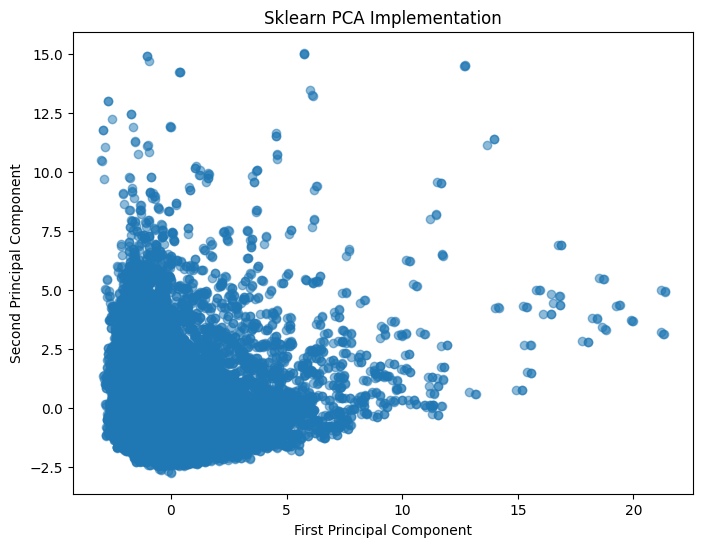

In [84]:
# Vẽ biểu đồ scatter của các thành phần chính
plt.figure(figsize=(8,6))
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], alpha=0.5)
plt.title('Sklearn PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### **II. Sequential code version 1: Pure PCA code using Python**

#### Code

In [85]:
def compute_covariance_matrix(X):
    n_samples, n_features = X.shape
    X_mean = np.zeros((n_features), dtype=np.float64)
    cov_matrix = np.zeros((n_features, n_features), dtype=np.float64)

    for i in range(n_features):
      s = 0.0
      for j in range(n_samples):
        s += X[j][i]
      X_mean[i] = s / n_samples

    for i in range(n_features):
      for j in range(n_features):
        sum_ij = 0.0
        for k in range(n_samples):
          sum_ij += (X[k, i] - X_mean[i]) * (X[k, j] - X_mean[j])
        cov_matrix[i, j] = sum_ij / (n_samples - 1)

    return cov_matrix

def project_data(X, eigenvectors):
    n_samples, n_features = X.shape
    n_components = eigenvectors.shape[1]
    X_pca = np.zeros((n_samples, n_components), dtype=np.float64)

    for i in range(n_samples):
      for j in range(n_components):
        sum_ij = 0.0
        for k in range(n_features):
          sum_ij += X[i, k] * eigenvectors[k, j]
        X_pca[i, j] = sum_ij

    return X_pca

def pca(X, n_components):
    # Compute the covariance matrix
    start_time = time.time()
    cov_matrix = compute_covariance_matrix(X)
    step_2_time = time.time() - start_time

    # Compute eigenvalues and eigenvectors using NumPy (on CPU)
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    step_3_time = time.time() - start_time

    # Sort eigenvectors by decreasing eigenvalues
    start_time = time.time()
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    step_4_time = time.time() - start_time

    # Select top n_components eigenvectors
    start_time = time.time()
    top_eigenvectors = eigenvectors[:, :n_components]
    step_5_time = time.time() - start_time

    # Project the data onto the new subspace
    start_time = time.time()
    X_pca = project_data(X, top_eigenvectors)
    step_6_time = time.time() - start_time

    return X_pca, top_eigenvectors, {
        'covariance_matrix': step_2_time,
        'eigenvalues_eigenvectors': step_3_time,
        'sort_eigenvalues_eigenvectors': step_4_time,
        'select_top_n_components_eigenvectors': step_5_time,
        'reduce_data': step_6_time
    }

In [86]:
# Convert DataFrame to list of lists
data = df_Standardize.values

# Perform PCA using our modified implementation
n_components = 2

start = time.time()
X_reduced_our, components_our, timings = pca(data, n_components)
end = time.time()

print(f'Processing time: {end - start} s')
print("Timing calculating covariance matrix:", timings['covariance_matrix'])
print("Timing getting eigenvalues and eigenvectors:", timings['eigenvalues_eigenvectors'])
print("Timing sorting eigenvalues and eigenvectors:", timings['sort_eigenvalues_eigenvectors'])
print("Timing Selecting top n_components eigenvectors:", timings['select_top_n_components_eigenvectors'])
print("Timing Reducing dimension of data:", timings['reduce_data'])


Processing time: 6.117866039276123 s
Timing calculating covariance matrix: 5.335357666015625
Timing getting eigenvalues and eigenvectors: 0.0020558834075927734
Timing sorting eigenvalues and eigenvectors: 3.743171691894531e-05
Timing Selecting top n_components eigenvectors: 1.1920928955078125e-06
Timing Reducing dimension of data: 0.7801980972290039


#### Accuracy
Compare the result of this version with the result of PCA library. If there is no difference then the result is correct.

Correlations between our implementation and sklearn principal components:
  PC1: 1.0000
  PC2: 1.0000

Correlations between our implementation and sklearn reduced data dimensions:
  Dimension 1: -1.0000
  Dimension 2: -1.0000



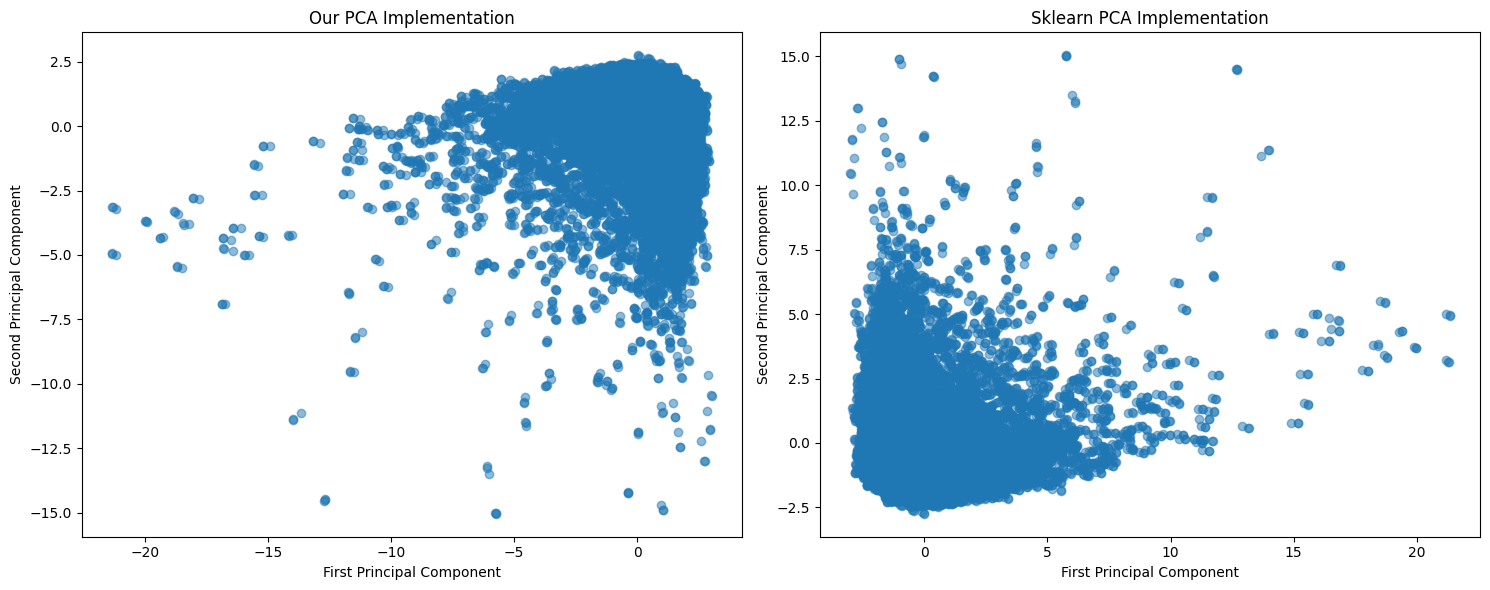

In [87]:
def compare_components(comp1, comp2):
    """Compare two sets of principal components."""
    correlations = []
    for c1, c2 in zip(comp1, comp2):
        corr, _ = pearsonr(c1, c2)
        correlations.append(abs(corr))  # Use absolute value as direction might be flipped
    return correlations

def compare_reduced_data(data1, data2):
    """Compare two sets of reduced data."""
    corr_matrix = np.corrcoef(np.array(data1).T, np.array(data2).T)
    n = len(data1[0])
    return [corr_matrix[i, n+i] for i in range(n)]


# Compare the results
component_correlations = compare_components(components_our.T, sklearn_pca.components_)
reduced_data_correlations = compare_reduced_data(X_reduced_our, X_reduced_sklearn)

print("Correlations between our implementation and sklearn principal components:")
for i, corr in enumerate(component_correlations):
    print(f"  PC{i+1}: {corr:.4f}")

print("\nCorrelations between our implementation and sklearn reduced data dimensions:")
for i, corr in enumerate(reduced_data_correlations):
    print(f"  Dimension {i+1}: {corr:.4f}")

print()
# Visualize both results
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.scatter([row[0] for row in X_reduced_our], [row[1] for row in X_reduced_our], alpha=0.5)
plt.title('Our PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(122)
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], alpha=0.5)
plt.title('Sklearn PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()

#### Processing time
Report processing time of each function in PCA algorithm and total processing time of PCA

In [88]:
pca_results.loc['Sequential code version 1: Pure PCA code using Python', 'Whole PCA algorithm'] = end - start
pca_results.loc['Sequential code version 1: Pure PCA code using Python', 'Calculate Covariance matrix'] = timings['covariance_matrix']
pca_results.loc['Sequential code version 1: Pure PCA code using Python', 'Reduce dimension of data'] = timings['reduce_data']
pca_results

,Whole PCA algorithm,Calculate Covariance matrix,Reduce dimension of data
Sequential code version 1: Pure PCA code using Python,6.117866,5.335358,0.780198


### **III. Sequential code version 2: Optimized sequential PCA code**
Using numba with decorator @jit to optimize sequential PCA code

#### Analyze
In this project we realize that there are 2 parts that occupy almost processing time `Calculating covariance matrix` and `Reducing dimension of data` so we are going to speed up these functions by running those sequentially on CPU by using @jit(cache=True, nopython=True) of numba.

#### Code

In [89]:
@jit(cache=True, nopython=True)
def compute_covariance_matrix(X):
    n_samples, n_features = X.shape
    X_mean = np.zeros((n_features), dtype=np.float64)
    cov_matrix = np.zeros((n_features, n_features), dtype=np.float64)

    for i in range(n_features):
      s = 0.0
      for j in range(n_samples):
        s += X[j][i]
      X_mean[i] = s / n_samples

    for i in range(n_features):
      for j in range(n_features):
        sum_ij = 0.0
        for k in range(n_samples):
          sum_ij += (X[k, i] - X_mean[i]) * (X[k, j] - X_mean[j])
        cov_matrix[i, j] = sum_ij / (n_samples - 1)

    return cov_matrix

@jit(cache=True, nopython=True)
def project_data(X, eigenvectors):
    n_samples, n_features = X.shape
    n_components = eigenvectors.shape[1]
    X_pca = np.zeros((n_samples, n_components), dtype=np.float64)

    for i in range(n_samples):
      for j in range(n_components):
        sum_ij = 0.0
        for k in range(n_features):
          sum_ij += X[i, k] * eigenvectors[k, j]
        X_pca[i, j] = sum_ij

    return X_pca

def pca(X, n_components):
    # Compute the covariance matrix
    start_time = time.time()
    cov_matrix = compute_covariance_matrix(X)
    step_2_time = time.time() - start_time

    # Compute eigenvalues and eigenvectors using NumPy (on CPU)
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    step_3_time = time.time() - start_time

    # Sort eigenvectors by decreasing eigenvalues
    start_time = time.time()
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    step_4_time = time.time() - start_time

    # Select top n_components eigenvectors
    start_time = time.time()
    top_eigenvectors = eigenvectors[:, :n_components]
    step_5_time = time.time() - start_time

    # Project the data onto the new subspace
    start_time = time.time()
    X_pca = project_data(X, top_eigenvectors)
    step_6_time = time.time() - start_time

    return X_pca, top_eigenvectors, {
        'covariance_matrix': step_2_time,
        'eigenvalues_eigenvectors': step_3_time,
        'sort_eigenvalues_eigenvectors': step_4_time,
        'select_top_n_components_eigenvectors': step_5_time,
        'reduce_data': step_6_time
    }

First run

In [90]:
n_components = 2
X_reduced_our, components_our, timings = pca(data, n_components)

Second run using cache

In [91]:
# Convert DataFrame to list of lists
data = df_Standardize.values

# Perform PCA using our modified implementation
n_components = 2

start = time.time()
X_reduced_our, components_our, timings = pca(data, n_components)
end = time.time()

print(f'Processing time: {end - start} s')
print("Timing calculating covariance matrix:", timings['covariance_matrix'])
print("Timing getting eigenvalues and eigenvectors:", timings['eigenvalues_eigenvectors'])
print("Timing sorting eigenvalues and eigenvectors:", timings['sort_eigenvalues_eigenvectors'])
print("Timing Selecting top n_components eigenvectors:", timings['select_top_n_components_eigenvectors'])
print("Timing Reducing dimension of data:", timings['reduce_data'])


Processing time: 0.013344287872314453 s
Timing calculating covariance matrix: 0.011343955993652344
Timing getting eigenvalues and eigenvectors: 0.00020170211791992188
Timing sorting eigenvalues and eigenvectors: 4.076957702636719e-05
Timing Selecting top n_components eigenvectors: 7.152557373046875e-06
Timing Reducing dimension of data: 0.0015683174133300781


#### Accuracy
Compare the result of this version with the result of PCA library. If there is no difference then the result is correct.

Correlations between our implementation and sklearn principal components:
  PC1: 1.0000
  PC2: 1.0000

Correlations between our implementation and sklearn reduced data dimensions:
  Dimension 1: -1.0000
  Dimension 2: -1.0000



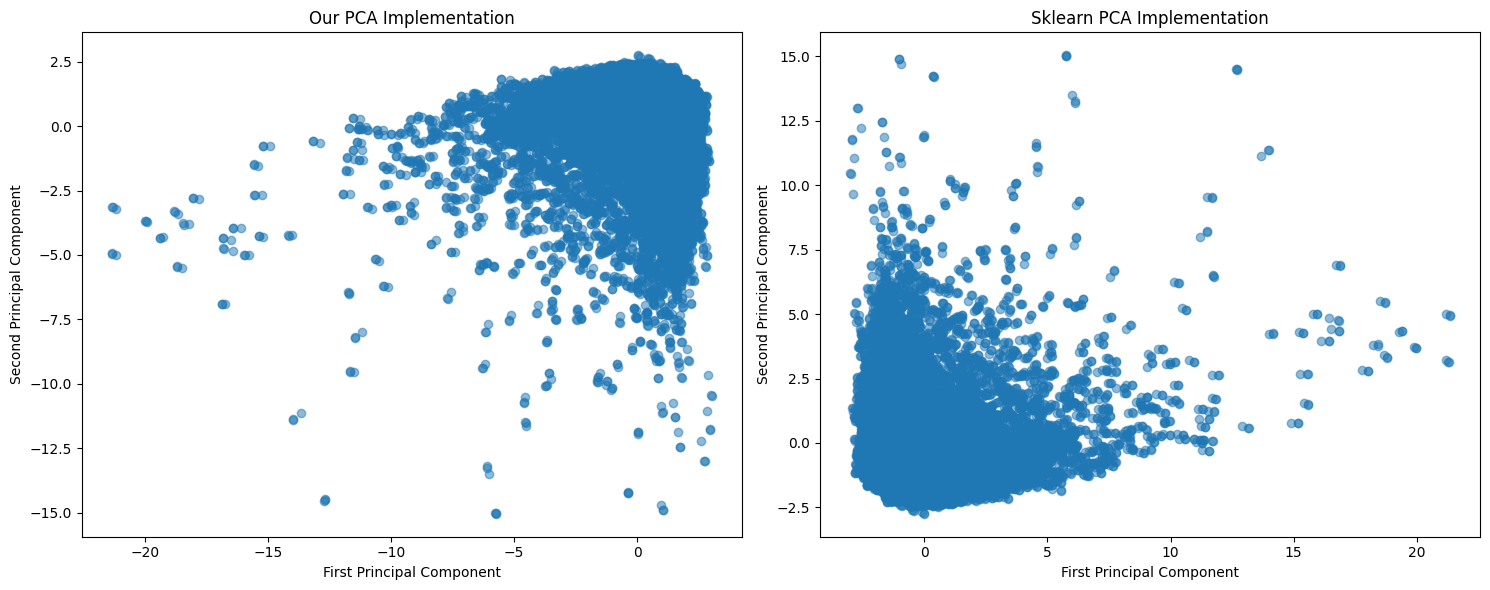

In [92]:
def compare_components(comp1, comp2):
    """Compare two sets of principal components."""
    correlations = []
    for c1, c2 in zip(comp1, comp2):
        corr, _ = pearsonr(c1, c2)
        correlations.append(abs(corr))  # Use absolute value as direction might be flipped
    return correlations

def compare_reduced_data(data1, data2):
    """Compare two sets of reduced data."""
    corr_matrix = np.corrcoef(np.array(data1).T, np.array(data2).T)
    n = len(data1[0])
    return [corr_matrix[i, n+i] for i in range(n)]


# Compare the results
component_correlations = compare_components(components_our.T, sklearn_pca.components_)
reduced_data_correlations = compare_reduced_data(X_reduced_our, X_reduced_sklearn)

print("Correlations between our implementation and sklearn principal components:")
for i, corr in enumerate(component_correlations):
    print(f"  PC{i+1}: {corr:.4f}")

print("\nCorrelations between our implementation and sklearn reduced data dimensions:")
for i, corr in enumerate(reduced_data_correlations):
    print(f"  Dimension {i+1}: {corr:.4f}")

print()
# Visualize both results
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.scatter([row[0] for row in X_reduced_our], [row[1] for row in X_reduced_our], alpha=0.5)
plt.title('Our PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(122)
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], alpha=0.5)
plt.title('Sklearn PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()

#### Processing time
Report processing time of each function in PCA algorithm and total processing time of PCA

In [93]:
pca_results.loc['Sequential code version 2: Optimized sequential PCA code', 'Whole PCA algorithm'] = end - start
pca_results.loc['Sequential code version 2: Optimized sequential PCA code', 'Calculate Covariance matrix'] = timings['covariance_matrix']
pca_results.loc['Sequential code version 2: Optimized sequential PCA code', 'Reduce dimension of data'] = timings['reduce_data']
pca_results

,Whole PCA algorithm,Calculate Covariance matrix,Reduce dimension of data
Sequential code version 1: Pure PCA code using Python,6.117866,5.335358,0.780198
Sequential code version 2: Optimized sequential PCA code,0.013344,0.011344,0.001568


### **IV. Parallel code version 1: Paralyzed PCA code running on CPU/host**
Using numba with decorator @jit and prange to paralyze sequential PCA code

#### Analyze
In this project we realize that there are 2 parts that occupy almost processing time `Calculating covariance matrix` and `Reducing dimension of data` so we are going to speed up these functions by running those sequentially on CPU by using @jit(parallel=True, cache=True, nopython=True).

#### **Code**

In [94]:
@jit(parallel=True, cache=True, nopython=True)
def compute_covariance_matrix(X):
    n_samples, n_features = X.shape
    X_mean = np.zeros((n_features), dtype=np.float64)
    cov_matrix = np.zeros((n_features, n_features), dtype=np.float64)

    for i in prange(n_features):
      s = 0.0
      for j in range(n_samples):
        s += X[j][i]
      X_mean[i] = s / n_samples

    for i in prange(n_features):
      for j in prange(n_features):
        sum_ij = 0.0
        for k in range(n_samples):
          sum_ij += (X[k, i] - X_mean[i]) * (X[k, j] - X_mean[j])
        cov_matrix[i, j] = sum_ij / (n_samples - 1)

    return cov_matrix

@jit(parallel=True, cache=True, nopython=True)
def project_data(X, eigenvectors):
    n_samples, n_features = X.shape
    n_components = eigenvectors.shape[1]
    X_pca = np.zeros((n_samples, n_components), dtype=np.float64)

    for i in prange(n_samples):
      for j in prange(n_components):
        sum_ij = 0.0
        for k in range(n_features):
          sum_ij += X[i, k] * eigenvectors[k, j]
        X_pca[i, j] = sum_ij

    return X_pca

def pca(X, n_components):
    # Compute the covariance matrix
    start_time = time.time()
    cov_matrix = compute_covariance_matrix(X)
    step_2_time = time.time() - start_time

    # Compute eigenvalues and eigenvectors using NumPy (on CPU)
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    step_3_time = time.time() - start_time

    # Sort eigenvectors by decreasing eigenvalues
    start_time = time.time()
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    step_4_time = time.time() - start_time

    # Select top n_components eigenvectors
    start_time = time.time()
    top_eigenvectors = eigenvectors[:, :n_components]
    step_5_time = time.time() - start_time

    # Project the data onto the new subspace
    start_time = time.time()
    X_pca = project_data(X, top_eigenvectors)
    step_6_time = time.time() - start_time

    return X_pca, top_eigenvectors, {
        'covariance_matrix': step_2_time,
        'eigenvalues_eigenvectors': step_3_time,
        'sort_eigenvalues_eigenvectors': step_4_time,
        'select_top_n_components_eigenvectors': step_5_time,
        'reduce_data': step_6_time
    }

First run

In [95]:
n_components = 2
X_reduced_our, components_our, timings = pca(data, n_components)

Second run using cache

In [96]:
# Convert DataFrame to list of lists
data = df_Standardize.values

# Perform PCA using our modified implementation
n_components = 2

start = time.time()
X_reduced_our, components_our, timings = pca(data, n_components)
end = time.time()

print(f'Processing time: {end - start} s')
print("Timing calculating covariance matrix:", timings['covariance_matrix'])
print("Timing getting eigenvalues and eigenvectors:", timings['eigenvalues_eigenvectors'])
print("Timing sorting eigenvalues and eigenvectors:", timings['sort_eigenvalues_eigenvectors'])
print("Timing Selecting top n_components eigenvectors:", timings['select_top_n_components_eigenvectors'])
print("Timing Reducing dimension of data:", timings['reduce_data'])


Processing time: 0.013939380645751953 s
Timing calculating covariance matrix: 0.012587308883666992
Timing getting eigenvalues and eigenvectors: 0.000152587890625
Timing sorting eigenvalues and eigenvectors: 2.288818359375e-05
Timing Selecting top n_components eigenvectors: 9.5367431640625e-07
Timing Reducing dimension of data: 0.0009784698486328125


#### Accuracy
Compare the result of this version with the result of PCA library. If there is no difference then the result is correct.

Correlations between our implementation and sklearn principal components:
  PC1: 1.0000
  PC2: 1.0000

Correlations between our implementation and sklearn reduced data dimensions:
  Dimension 1: -1.0000
  Dimension 2: -1.0000



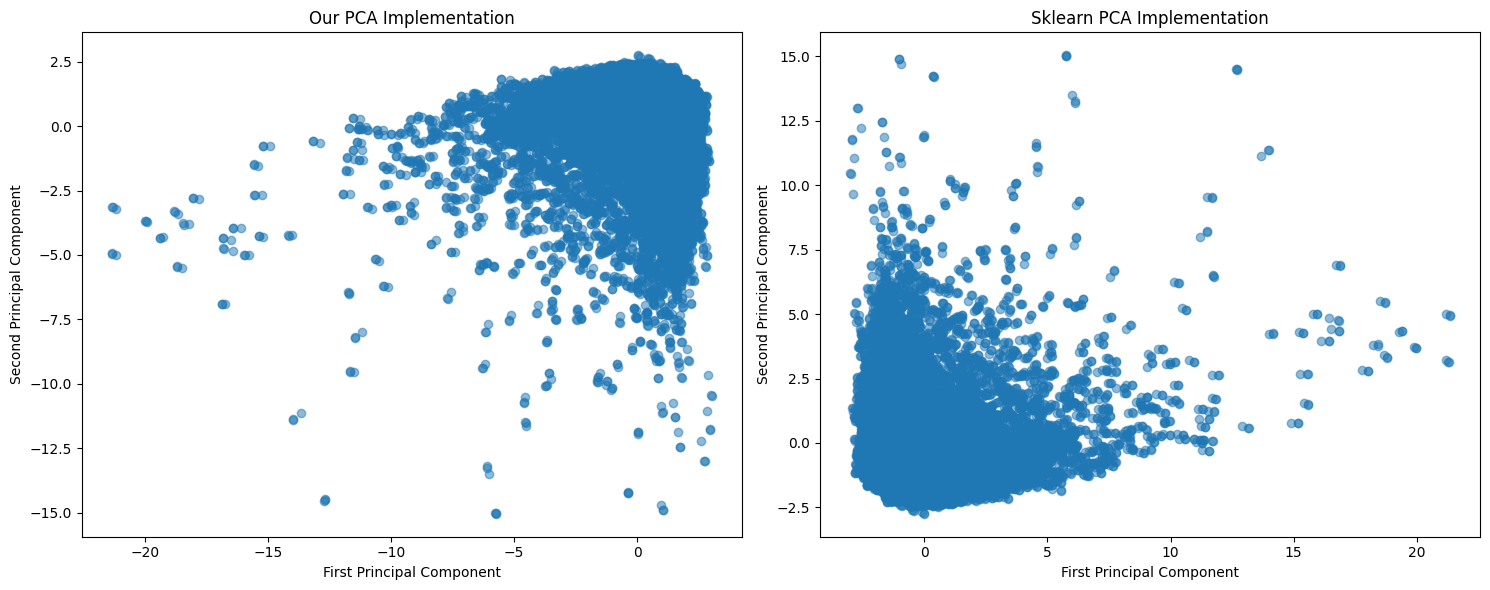

In [97]:
def compare_components(comp1, comp2):
    """Compare two sets of principal components."""
    correlations = []
    for c1, c2 in zip(comp1, comp2):
        corr, _ = pearsonr(c1, c2)
        correlations.append(abs(corr))  # Use absolute value as direction might be flipped
    return correlations

def compare_reduced_data(data1, data2):
    """Compare two sets of reduced data."""
    corr_matrix = np.corrcoef(np.array(data1).T, np.array(data2).T)
    n = len(data1[0])
    return [corr_matrix[i, n+i] for i in range(n)]


# Compare the results
component_correlations = compare_components(components_our.T, sklearn_pca.components_)
reduced_data_correlations = compare_reduced_data(X_reduced_our, X_reduced_sklearn)

print("Correlations between our implementation and sklearn principal components:")
for i, corr in enumerate(component_correlations):
    print(f"  PC{i+1}: {corr:.4f}")

print("\nCorrelations between our implementation and sklearn reduced data dimensions:")
for i, corr in enumerate(reduced_data_correlations):
    print(f"  Dimension {i+1}: {corr:.4f}")

print()
# Visualize both results
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.scatter([row[0] for row in X_reduced_our], [row[1] for row in X_reduced_our], alpha=0.5)
plt.title('Our PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(122)
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], alpha=0.5)
plt.title('Sklearn PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()

#### Processing time
Report processing time of each function in PCA algorithm and total processing time of PCA

In [98]:
pca_results.loc['Parallel code version 1: Paralyzed PCA code running on CPU/host', 'Whole PCA algorithm'] = end - start
pca_results.loc['Parallel code version 1: Paralyzed PCA code running on CPU/host', 'Calculate Covariance matrix'] = timings['covariance_matrix']
pca_results.loc['Parallel code version 1: Paralyzed PCA code running on CPU/host', 'Reduce dimension of data'] = timings['reduce_data']
pca_results

,Whole PCA algorithm,Calculate Covariance matrix,Reduce dimension of data
Sequential code version 1: Pure PCA code using Python,6.117866,5.335358,0.780198
Sequential code version 2: Optimized sequential PCA code,0.013344,0.011344,0.001568
Parallel code version 1: Paralyzed PCA code running on CPU/host,0.013939,0.012587,0.000978


### **V. Parallel code version 2: Paralyzed PCA code running on GPU/device**

#### Analyze
In this project we realize that there are 2 parts that occupy almost processing time `Calculating covariance matrix` and `Reducing dimension of data` so we are going to speed up these functions by running those parallely on GPU by using numba.

#### **Design**

### 1. **CUDA Kernel: `covariance_matrix_kernel`**

#### **Function Signature:**
```python
@cuda.jit
def covariance_matrix_kernel(X, X_mean, cov_matrix):
```

#### **Inputs:**
- **`X` (2D array of shape `(n_samples, n_features)`):**
  - The input data matrix where `n_samples` is the number of data points, and `n_features` is the number of features (dimensions).
- **`X_mean` (1D array of shape `(n_features,)`):**
  - The mean of each feature across all samples. This is precomputed on the host and transferred to the device.
- **`cov_matrix` (2D array of shape `(n_features, n_features)`):**
  - The covariance matrix that the kernel will compute. Initially, it's an empty matrix filled with zeros, and the kernel will populate it.

#### **Outputs:**
- **`cov_matrix` (2D array of shape `(n_features, n_features)`):**
  - The resulting covariance matrix. Each element `(i, j)` in this matrix represents the covariance between the `i-th` and `j-th` features.

#### **Thread Organization:**
- The kernel is launched with a 2D grid of threads, where each thread computes a single element `(i, j)` of the covariance matrix.

#### **Thread Execution:**
- **Thread Indices:**
  - **`i, j = cuda.grid(2)`**:
    - `i` and `j` are the row and column indices in the covariance matrix that this particular thread is responsible for computing.
    - `cuda.grid(2)` generates these indices based on the block and thread indices within the 2D grid.
  
- **Covariance Computation:**
  - **Boundary Check:**
    ```python
    if i < n_features and j < n_features:
    ```
    - Ensures that `i` and `j` are within the bounds of the covariance matrix dimensions.
  
  - **Accumulation Loop:**
    ```python
    sum_ij = 0.0
    for k in range(n_samples):
        sum_ij += (X[k, i] - X_mean[i]) * (X[k, j] - X_mean[j])
    ```
    - Each thread computes the covariance between the `i-th` and `j-th` features by iterating over all samples (`k` from `0` to `n_samples - 1`).
    - `sum_ij` accumulates the product of deviations of the `i-th` and `j-th` features from their respective means.
  
  - **Final Covariance Value:**
    ```python
    cov_matrix[i, j] = sum_ij / (n_samples - 1)
    ```
    - The computed covariance value is stored in the covariance matrix after normalization by `(n_samples - 1)`.



---



### 2. **CUDA Kernel: `project_data_kernel`**

#### **Function Signature:**
```python
@cuda.jit
def project_data_kernel(X, eigenvectors, X_pca):
```

#### **Inputs:**
- **`X` (2D array of shape `(n_samples, n_features)`):**
  - The input data matrix where `n_samples` is the number of data points and `n_features` is the number of features (dimensions).
- **`eigenvectors` (2D array of shape `(n_features, n_components)`):**
  - The matrix of eigenvectors where each column corresponds to an eigenvector, and `n_components` is the number of principal components.
- **`X_pca` (2D array of shape `(n_samples, n_components)`):**
  - The output matrix where the projected data will be stored. Each row corresponds to a data point, and each column corresponds to a principal component.

#### **Outputs:**
- **`X_pca` (2D array of shape `(n_samples, n_components)`):**
  - The resulting matrix after projecting the original data onto the principal components.

#### **Thread Organization:**
- The kernel is launched with a 2D grid of threads. Each thread is responsible for computing a single element `(i, j)` of the `X_pca` matrix, where `i` corresponds to the data point, and `j` corresponds to the principal component.

#### **Thread Execution:**
- **Thread Indices:**
  - **`i, j = cuda.grid(2)`**:
    - `i` and `j` are the row and column indices in the `X_pca` matrix that this particular thread is responsible for computing.
    - `cuda.grid(2)` generates these indices based on the block and thread indices within the 2D grid.

- **Matrix Multiplication:**
  - **Boundary Check:**
    ```python
    if i < n_samples and j < n_components:
    ```
    - Ensures that `i` and `j` are within the bounds of the `X_pca` matrix dimensions.
  
  - **Accumulation Loop:**
    ```python
    sum_ij = 0.0
    for k in range(n_features):
        sum_ij += X[i, k] * eigenvectors[k, j]
    ```
    - Each thread computes the dot product between the `i-th` data point in `X` and the `j-th` eigenvector. This dot product represents the projection of the `i-th` data point onto the `j-th` principal component.
  
  - **Storing the Result:**
    ```python
    X_pca[i, j] = sum_ij
    ```
    - The computed projection value is stored in the `X_pca` matrix.




#### **Code**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import cuda

@cuda.jit
def covariance_matrix_kernel(X, X_mean, cov_matrix):
    i, j = cuda.grid(2)
    n_samples, n_features = X.shape

    if i < n_features and j < n_features:
        sum_ij = 0.0
        for k in range(n_samples):
            sum_ij += (X[k, i] - X_mean[i]) * (X[k, j] - X_mean[j])
        cov_matrix[i, j] = sum_ij / (n_samples - 1)

def compute_covariance_matrix_cuda(X):
    n_samples, n_features = X.shape
    X_mean = np.mean(X, axis=0)
    cov_matrix = np.zeros((n_features, n_features), dtype=np.float64)

    d_X = cuda.to_device(X)
    d_X_mean = cuda.to_device(X_mean)
    d_cov_matrix = cuda.to_device(cov_matrix)

    threadsperblock = (16, 16)
    blockspergrid_x = (n_features + threadsperblock[0] - 1) // threadsperblock[0]
    blockspergrid_y = (n_features + threadsperblock[1] - 1) // threadsperblock[1]
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    covariance_matrix_kernel[blockspergrid, threadsperblock](d_X, d_X_mean, d_cov_matrix)

    return d_cov_matrix.copy_to_host()

@cuda.jit
def project_data_kernel(X, eigenvectors, X_pca):
    i, j = cuda.grid(2)
    n_samples, n_features = X.shape
    n_components = eigenvectors.shape[1]

    if i < n_samples and j < n_components:
        sum_ij = 0.0
        for k in range(n_features):
            sum_ij += X[i, k] * eigenvectors[k, j]
        X_pca[i, j] = sum_ij

def project_data_cuda(X, eigenvectors):
    n_samples, n_features = X.shape
    n_components = eigenvectors.shape[1]
    X_pca = np.zeros((n_samples, n_components), dtype=np.float64)

    d_X = cuda.to_device(X)
    d_eigenvectors = cuda.to_device(eigenvectors)
    d_X_pca = cuda.to_device(X_pca)

    threadsperblock = (16, 16)
    blockspergrid_x = (n_samples + threadsperblock[0] - 1) // threadsperblock[0]
    blockspergrid_y = (n_components + threadsperblock[1] - 1) // threadsperblock[1]
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    project_data_kernel[blockspergrid, threadsperblock](d_X, d_eigenvectors, d_X_pca)

    return d_X_pca.copy_to_host()

def pca_cuda(X, n_components):
    # Compute the covariance matrix
    start_time = time.time()
    cov_matrix = compute_covariance_matrix_cuda(X)
    step_2_time = time.time() - start_time

    # Compute eigenvalues and eigenvectors using NumPy (on CPU)
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    step_3_time = time.time() - start_time

    # Sort eigenvectors by decreasing eigenvalues
    start_time = time.time()
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    step_4_time = time.time() - start_time

    # Select top n_components eigenvectors
    start_time = time.time()
    top_eigenvectors = eigenvectors[:, :n_components]
    step_5_time = time.time() - start_time

    # Project the data onto the new subspace
    start_time = time.time()
    X_pca = project_data_cuda(X, top_eigenvectors)
    step_6_time = time.time() - start_time

    return X_pca, top_eigenvectors, {
        'covariance_matrix': step_2_time,
        'eigenvalues_eigenvectors': step_3_time,
        'sort_eigenvalues_eigenvectors': step_4_time,
        'select_top_n_components_eigenvectors': step_5_time,
        'reduce_data': step_6_time
    }

First run

In [100]:
n_components = 2

X_reduced_our, components_our, timings = pca_cuda(data, n_components)

Second run using cache

In [101]:
# Convert DataFrame to list of lists
data = df_Standardize.values

# Perform PCA using our modified implementation
n_components = 2

start = time.time()
X_reduced_our, components_our, timings = pca_cuda(data, n_components)
end = time.time()

print(f'Processing time: {end - start} s')
print("Timing calculating covariance matrix:", timings['covariance_matrix'])
print("Timing getting eigenvalues and eigenvectors:", timings['eigenvalues_eigenvectors'])
print("Timing sorting eigenvalues and eigenvectors:", timings['sort_eigenvalues_eigenvectors'])
print("Timing Selecting top n_components eigenvectors:", timings['select_top_n_components_eigenvectors'])
print("Timing Reducing dimension of data:", timings['reduce_data'])


Processing time: 0.025934696197509766 s
Timing calculating covariance matrix: 0.023378372192382812
Timing getting eigenvalues and eigenvectors: 0.00011920928955078125
Timing sorting eigenvalues and eigenvectors: 2.8848648071289062e-05
Timing Selecting top n_components eigenvectors: 9.5367431640625e-07
Timing Reducing dimension of data: 0.002274036407470703


#### Accuracy
Compare the result of this version with the result of PCA library. If there is no difference then the result is correct.

Correlations between our implementation and sklearn principal components:
  PC1: 1.0000
  PC2: 1.0000

Correlations between our implementation and sklearn reduced data dimensions:
  Dimension 1: -1.0000
  Dimension 2: -1.0000



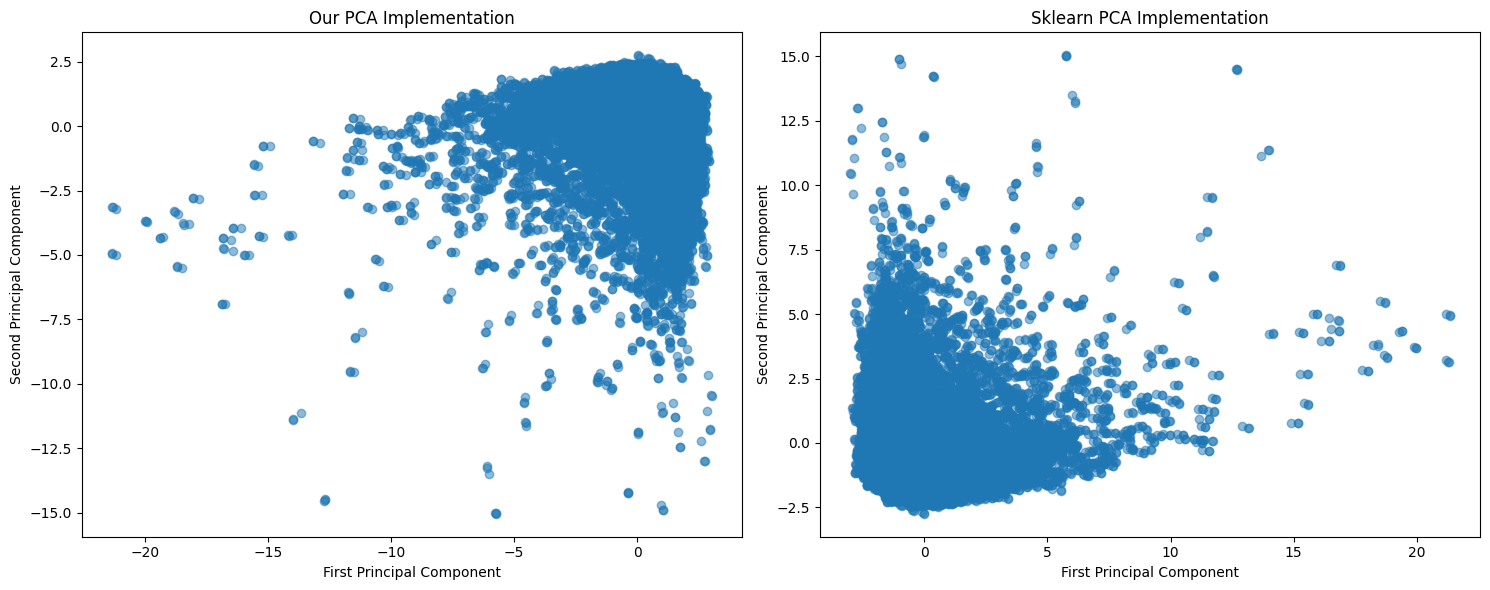

In [102]:
def compare_components(comp1, comp2):
    """Compare two sets of principal components."""
    correlations = []
    for c1, c2 in zip(comp1, comp2):
        corr, _ = pearsonr(c1, c2)
        correlations.append(abs(corr))  # Use absolute value as direction might be flipped
    return correlations

def compare_reduced_data(data1, data2):
    """Compare two sets of reduced data."""
    corr_matrix = np.corrcoef(np.array(data1).T, np.array(data2).T)
    n = len(data1[0])
    return [corr_matrix[i, n+i] for i in range(n)]


# Compare the results
component_correlations = compare_components(components_our.T, sklearn_pca.components_)
reduced_data_correlations = compare_reduced_data(X_reduced_our, X_reduced_sklearn)

print("Correlations between our implementation and sklearn principal components:")
for i, corr in enumerate(component_correlations):
    print(f"  PC{i+1}: {corr:.4f}")

print("\nCorrelations between our implementation and sklearn reduced data dimensions:")
for i, corr in enumerate(reduced_data_correlations):
    print(f"  Dimension {i+1}: {corr:.4f}")

print()
# Visualize both results
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.scatter([row[0] for row in X_reduced_our], [row[1] for row in X_reduced_our], alpha=0.5)
plt.title('Our PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(122)
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], alpha=0.5)
plt.title('Sklearn PCA Implementation')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()

#### Processing time
Report processing time of each function in PCA algorithm and total processing time of PCA

In [103]:
pca_results.loc['Parallel code version 2: Paralyzed PCA code running on GPU/device', 'Whole PCA algorithm'] = end - start
pca_results.loc['Parallel code version 2: Paralyzed PCA code running on GPU/device', 'Calculate Covariance matrix'] = timings['covariance_matrix']
pca_results.loc['Parallel code version 2: Paralyzed PCA code running on GPU/device', 'Reduce dimension of data'] = timings['reduce_data']
pca_results

,Whole PCA algorithm,Calculate Covariance matrix,Reduce dimension of data
Sequential code version 1: Pure PCA code using Python,6.117866,5.335358,0.780198
Sequential code version 2: Optimized sequential PCA code,0.013344,0.011344,0.001568
Parallel code version 1: Paralyzed PCA code running on CPU/host,0.013939,0.012587,0.000978
Parallel code version 2: Paralyzed PCA code running on GPU/device,0.025935,0.023378,0.002274


### **VI. Visualize clusters**

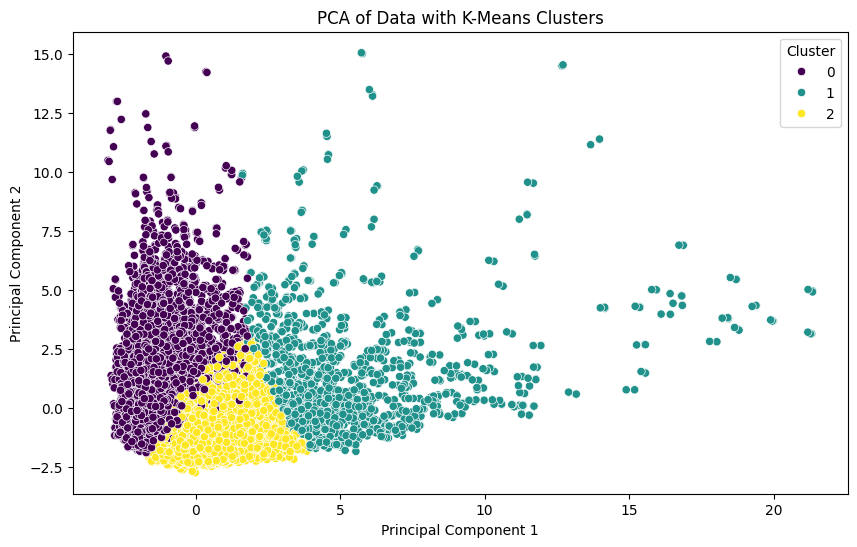

In [104]:
# Convert the labels to a DataFrame
labels_df = pd.DataFrame(Kmean_sklearn.labels_, columns=['Cluster'])

# Merge the labels with the PCA components
pca2_with_labels = pd.concat([pca2, labels_df], axis=1)

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca2_with_labels.iloc[:, 0], y=pca2_with_labels.iloc[:, 1], hue=pca2_with_labels['Cluster'], palette='viridis')
plt.title('PCA of Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


The shape of the cluster helps us draw the conclusion that using K Mean is reasonable

## **5.3. Meaning of clusters**

In [105]:
def create_cluster_profiles(df, labels, centers):
    df['Cluster'] = labels
    centroid_df = pd.DataFrame(centers, columns=df.columns[:-1])

    # Calculate feature importance
    feature_importance = np.abs(centroid_df - centroid_df.mean()).mean()
    top_features = feature_importance.sort_values(ascending=False).head(3).index


    profiles = []
    for i in range(K):
        cluster_data = df[df['Cluster'] == i]
        profile = {}
        for feature in top_features:
            mean_value = cluster_data[feature].mean()
            overall_mean = df[feature].mean()
            if mean_value > overall_mean * 1.2:
                level = "High"
            elif mean_value < overall_mean * 0.8:
                level = "Low"
            else:
                level = "Average"
            profile[feature] = level
        profiles.append(profile)

    return profiles, feature_importance
# Example usage
# Assuming df is your DataFrame, kmeans is your fitted KMeans model
cluster_labels, feature_importance = create_cluster_profiles(df_Standardize, Kmean_sklearn.labels_, Kmean_sklearn.cluster_centers_)
for i, label in enumerate(cluster_labels):
    print(f"Cluster {i}: {label}")

Cluster 0: {'PURCHASES': 'Low', 'PURCHASES_TRX': 'Low', 'ONEOFF_PURCHASES': 'Low'}
Cluster 1: {'PURCHASES': 'High', 'PURCHASES_TRX': 'High', 'ONEOFF_PURCHASES': 'High'}
Cluster 2: {'PURCHASES': 'High', 'PURCHASES_TRX': 'High', 'ONEOFF_PURCHASES': 'Low'}


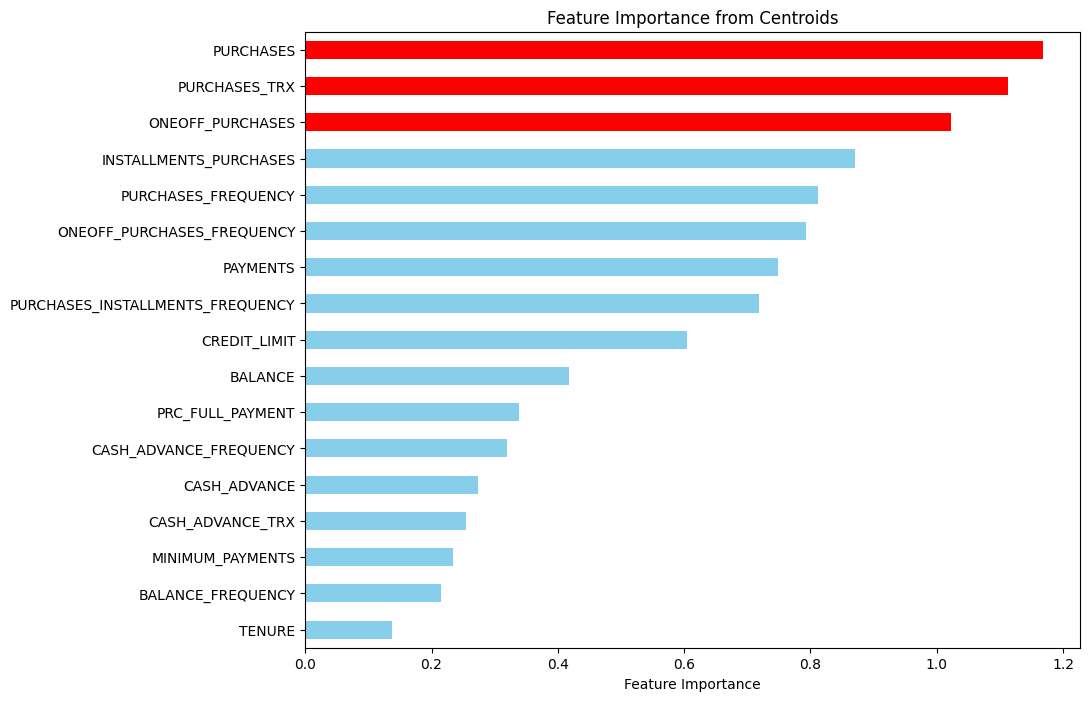

In [106]:
import matplotlib.pyplot as plt

# Sort the feature importance in ascending order
sorted_importance = feature_importance.sort_values()

# Get the indices of the top 3 features
top3_indices = sorted_importance[-3:].index

# Create a list of colors, highlighting the top 3 features
colors = ['red' if idx in top3_indices else 'skyblue' for idx in sorted_importance.index]

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='barh', color=colors)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Centroids')
plt.show()


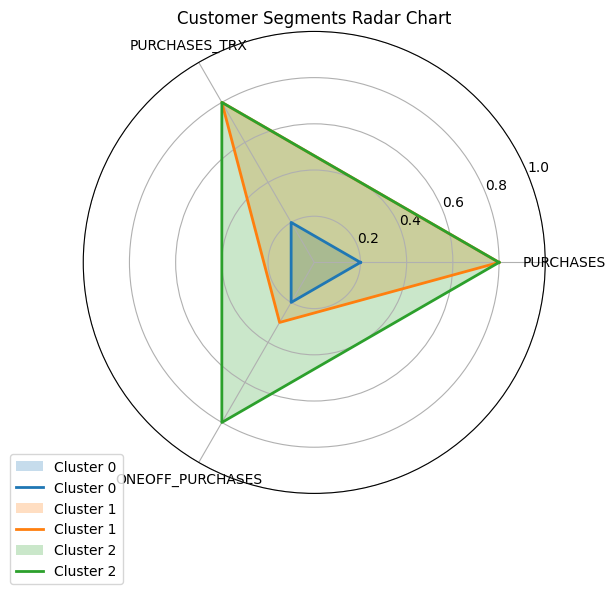

In [107]:
# @title Radar chart
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Data for the clusters
cluster_data = {
    'Cluster 0': [0.2, 0.2, 0.2],  # Low across all features
    'Cluster 1': [0.8, 0.8, 0.3],  # High in PURCHASES, PURCHASES_TRX, low in ONEOFF_PURCHASES
    'Cluster 2': [0.8, 0.8, 0.8]   # High across all features
}

# Features for the radar chart
features = ['PURCHASES', 'PURCHASES_TRX', 'ONEOFF_PURCHASES']
N = len(features)

# What will be the angle of each axis in the plot (in radians)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start to the end.
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each cluster
for cluster, values in cluster_data.items():
    values += values[:1]
    ax.fill(angles, values, alpha=0.25, label=cluster)
    ax.plot(angles, values, linewidth=2, label=cluster)

# Add feature labels to the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Set the range for each axis (0 to 1 in this case)
ax.set_ylim(0, 1)

# Add a legend and a title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Customer Segments Radar Chart')
plt.show()


### **I. Cluster Insights**

1. **Cluster 0:**
   - **Profile:** Customers with low overall purchase amounts, low transaction frequency, and low one-off purchases.
   - **Insight:** This cluster represents low-engagement customers. They might be cautious spenders or less active in using their credit cards.

2. **Cluster 1:**
   - **Profile:** Customers with high purchase amounts and transaction frequency, but low one-off purchase amounts.
   - **Insight:** These customers are regular spenders who prefer smaller, frequent transactions. They might be using the card for daily expenses rather than large, occasional purchases.

3. **Cluster 2:**
   - **Profile:** Customers with high purchase amounts, high transaction frequency, and high one-off purchases.
   - **Insight:** This is the premium segment, with customers who make frequent transactions and are also willing to spend large amounts in a single go. They likely have higher credit limits and are more comfortable with larger financial commitments.



### **II. Marketing Strategies**

1. **Cluster 0 (Low Engagement):**
   - **Objective:** Increase card usage.
   - **Strategy:**
     - **Promotional Offers:** Introduce targeted promotions like cashback or discounts for transactions made within specific categories (e.g., groceries, fuel).
     - **Engagement Campaigns:** Encourage these customers to use their cards more frequently by offering bonuses or rewards for reaching certain spending thresholds.
     - **Educational Content:** Provide content that educates them on the benefits of using credit cards for various types of purchases.

2. **Cluster 1 (Frequent Small Spenders):**
   - **Objective:** Encourage higher-value purchases.
   - **Strategy:**
     - **Upgrade Offers:** Offer incentives to upgrade their credit limits or switch to cards with better benefits, which might encourage them to make larger purchases.
     - **Bundle Offers:** Introduce bundled services or products that require higher spending, such as travel packages or electronics, combined with financing options.
     - **Loyalty Programs:** Enhance loyalty programs that reward frequent use with points that can be redeemed for larger purchases.

3. **Cluster 2 (High Spenders):**
   - **Objective:** Retain and reward premium customers.
   - **Strategy:**
     - **Exclusive Rewards:** Offer exclusive rewards such as luxury travel perks, concierge services, or access to premium events to retain these high-value customers.
     - **Personalized Offers:** Provide personalized offers based on their spending history, such as discounts on categories they frequently spend in or special financing for large purchases.
     - **VIP Programs:** Create a VIP program with higher rewards rates, lower interest rates, or exclusive access to premium products and services.

# **6. Result**

In [108]:
kmean_results

,Whole Kmeans algorithm,Calculating distance and Assigning label,Updating centers,Loop,Accuracy
Sequential 1: Pure Python,48.407036,41.136683,7.269764,23.0,0.001648
Sequential 2: optimized KMeans code,0.075107,0.043501,0.031201,23.0,0.001648
Parallel code version 1: paralyzed KMeans code on CPU/host,0.128867,0.080388,0.047995,24.0,0.001648
Parallel code version 2: Paralyzed KMeans code on GPU/device,0.182208,0.076316,0.103071,23.0,0.001648
Parallel code version 3 (optimized): Utilize shared memory while running on GPU/device,0.078092,0.025787,0.048389,23.0,0.001648


In [109]:
pca_results

,Whole PCA algorithm,Calculate Covariance matrix,Reduce dimension of data
Sequential code version 1: Pure PCA code using Python,6.117866,5.335358,0.780198
Sequential code version 2: Optimized sequential PCA code,0.013344,0.011344,0.001568
Parallel code version 1: Paralyzed PCA code running on CPU/host,0.013939,0.012587,0.000978
Parallel code version 2: Paralyzed PCA code running on GPU/device,0.025935,0.023378,0.002274
